# MICROSOFT WALWARE PREDICTION 

## Tabla de contenidos

* [A. Introduction](#introduction)
* [B. Importación de librerías](#libraries)
* [C. Importación de data](#data)


* [2. MLC2: Data understanding](#data_understanding)
    * [2.1. MLC2.1.: Univariate data analysis](#univariate_data_analysis)
        * [2.1.1. Dataset size](#dataset_size)
        * [2.1.2. Direct visualization of the data](#direct_visualization)
        * [2.1.3. Variable types](#variable_types)
        * [2.1.4. Descriptive statistics](#descriptive_statistics)
        * [2.1.5. Null values](#null_values)
        * [2.1.6. Distribution of target](#target_distribution)
        * [2.1.7-2.1.10. Variables distribution & relations with target](#variables_distribution)
    * [2.2. MLC2.2.: Multivariate data analysis](#multivariate_data_analysis)

  
        
* [3. MLC3: Data preparation](#data_preparation)
    * [3.1. MLC 3.1. Data cleaning](#data_cleaning)
        * [3.1.1. Dealing with variable types](#dealing_variable_types)
        * [3.1.2. Imputation of null values](#nulls_imputation)
        * [3.1.4. Elimination of features with low variance](#low_variance)
    * [3.2. MLC 3.2. Data transformation](#data_transformation)
        * [3.2.1. Transformation of categorical variables](#transformation_categorical)
    * [3.3. MLC 3.3. Feature engineering](#feature_engineering)



* [4. MLC4: Modelling](#modelling)
    * [4.1. MLC 4.1. Data partition and sampling](#dataset_partition)
        * [Random hold hout](#random_holdout)
        * [K-fold cross-validation](#k_fold)
    * [4.2. MLC 4.2. Model definition](#model_definition)
    * [4.3. MLC 4.3. Model optimization](#model_optimization)
        * [4.3.1. Hyperparameter optimization](#hyperparameter_optimization)
        * [4.3.2. Ensemble models](#ensemble_models)


* [5. MLC5: Evaluation](#model_evaluation)

## A. Introduction <a class="anchor" id="introduction"></a>

Una evaluación de vulnerabilidad contra el malware (software malicioso) es uno de los temas más importantes en el ámbito de la ciberseguridad. Todos quieren sentirse seguros, ¿verdad? El problema de la infección por malware puede afectar a cualquier persona, desde individuos privados hasta empresas y agencias gubernamentales. El malware en sí mismo es un software infeccioso (principalmente troyanos y virus) que intenta abusar o causar daño a una computadora, servidor, así como extraer/robar información confidencial o privada. Estos datos pueden ser, por ejemplo, los detalles de tu cuenta bancaria, los detalles de tus tarjetas de crédito, varias contraseñas o cualquier otro dato confidencial (por ejemplo, documentos internos de la empresa).

Para contrarrestar estas amenazas, están introduciendo contramedidas activas y pasivas. Estas son, por ejemplo, software antivirus y anti-malware (activas). A pesar de estas contramedidas activas, el malware puede ingresar al sistema utilizando defectos de seguridad en el propio software, por ejemplo, en varias versiones/construcciones del sistema operativo, navegadores de internet o sus complementos. Por lo tanto, los sistemas operativos y otro software deben actualizarse de vez en cuando para mejorar su rendimiento y seguridad.

¿Puedes ayudar a proteger más de mil millones de máquinas del daño ANTES de que ocurra?

## B. Importing libraries

In [227]:
import numpy as np # linear algebra
import pandas as pd # Series and DataFrames

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')#es el style para gráficos
#Una vez que tengamos el dataset, establecemos que puede imprimir un máximo de 100 filas 
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:,.2f}'.format

## C. Importing data

In [228]:
data ='sample_mmp.csv'

In [229]:
df=pd.read_csv(data, sep = ',', index_col = 0, low_memory=False) 
df

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
8427007,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.00,0,NaN,"53,447.00",...,"19,951.00",0,NaN,0.00,0,0,0.00,0.00,11.00,1
8829090,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.00,0,NaN,"53,447.00",...,"48,753.00",0,0.00,0.00,0,0,0.00,1.00,3.00,0
2731904,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,0,7.00,0,NaN,"46,781.00",...,"33,111.00",1,0.00,0.00,1,1,0.00,0.00,15.00,0
1359513,270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,0,7.00,0,NaN,"53,447.00",...,"48,473.00",1,NaN,0.00,0,0,0.00,0.00,15.00,1
236059,06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.15200.1,4.18.1807.18075,1.275.511.0,0,7.00,0,NaN,"47,238.00",...,"4,343.00",1,NaN,0.00,1,0,0.00,1.00,13.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5826339,a739cacc292f3f1e745827c1ca6c6ada,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1090.0,0,7.00,0,NaN,"53,447.00",...,"33,088.00",1,0.00,0.00,1,0,0.00,1.00,10.00,0
5740034,a4c232d528d98343e8f1b73650da7b82,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1620.0,0,7.00,0,NaN,"53,447.00",...,NaN,0,NaN,0.00,0,0,0.00,0.00,15.00,0
8819786,fd16cd542d660848d272e4552bcccb1e,win8defender,1.1.15300.5,4.13.17134.112,1.275.1343.0,0,7.00,0,NaN,"53,447.00",...,"41,727.00",0,NaN,0.00,0,0,0.00,0.00,8.00,0
8713685,fa0841f8f6147de7c3d287e05270ed42,win8defender,1.1.15100.1,4.14.17639.18041,1.273.483.0,0,7.00,0,NaN,"43,856.00",...,"11,947.00",0,NaN,0.00,0,0,0.00,0.00,1.00,0


## MLC2: Data Understanding<a class="anchor" id="data_understanding"></a>

## MLC2.1: Univariate data analysis<a class="anchor" id="univariate_data_analysis"></a>

### 2.1.1. Dataset size<a class="anchor" id="dataset_size"></a>

In [230]:
df.info(verbose=False) #Información resumida del df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 8427007 to 4295573
Columns: 83 entries, MachineIdentifier to HasDetections
dtypes: float64(36), int64(17), object(30)
memory usage: 320.4+ MB


### 2.1.2.  Direct visualization of the data<a class="anchor" id="direct_visualization"></a>

In [231]:
df.shape #El número de filas son 500,000 y columnas 83.

(500000, 83)

In [232]:
df.head()


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
8427007,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.00,0,NaN,"53,447.00",...,"19,951.00",0,NaN,0.00,0,0,0.00,0.00,11.00,1
8829090,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.00,0,NaN,"53,447.00",...,"48,753.00",0,0.00,0.00,0,0,0.00,1.00,3.00,0
2731904,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,0,7.00,0,NaN,"46,781.00",...,"33,111.00",1,0.00,0.00,1,1,0.00,0.00,15.00,0
1359513,270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,0,7.00,0,NaN,"53,447.00",...,"48,473.00",1,NaN,0.00,0,0,0.00,0.00,15.00,1
236059,06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.15200.1,4.18.1807.18075,1.275.511.0,0,7.00,0,NaN,"47,238.00",...,"4,343.00",1,NaN,0.00,1,0,0.00,1.00,13.00,1


### 2.1.3. Types of variables available<a class="anchor" id="variable_types"></a>

In [233]:
#Las columnas que contienen cadena de texto estan convertidas en tipo object
#Las columnas que solo tiene valores numericos las convertimos en tipo float. 
for columna in df.columns:
    valores = df[columna]
    if valores.apply(lambda x: str(x).isalpha()).all():
        df[columna] = valores.astype(str)
    elif pd.to_numeric(valores, errors='coerce').notnull().all():
        df[columna] = valores.astype(float)
    else:
        df[columna] = valores

In [234]:
#Las columnas sin decimales, las convertimos a int
for columna in df.columns:
    if df[columna].dtype == float:
        decimales = df[columna] % 1
        if decimales.eq(0).all():
            df[columna] = df[columna].astype(int)


In [235]:
#Las columnas que tiene 0 y 1(los booleanos), las convertimos en int8
for columna in df.columns:
    if set(df[columna].unique()) == {0, 1}:
        df[columna] = df[columna].astype('bool')

In [236]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 8427007 to 4295573
Data columns (total 83 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   MachineIdentifier                                  500000 non-null  object 
 1   ProductName                                        500000 non-null  object 
 2   EngineVersion                                      500000 non-null  object 
 3   AppVersion                                         500000 non-null  object 
 4   AvSigVersion                                       500000 non-null  object 
 5   IsBeta                                             500000 non-null  bool   
 6   RtpStateBitfield                                   498168 non-null  float64
 7   IsSxsPassiveMode                                   500000 non-null  bool   
 8   DefaultBrowsersIdentifier                          24061 non-null  

In [237]:
#Reducimos la memoria a 287.1 +MB 
#Clasificamos las columnas en 4 tipos: int8-bool(10), float64(36), int64(7), object(30)
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 8427007 to 4295573
Columns: 83 entries, MachineIdentifier to HasDetections
dtypes: bool(10), float64(36), int64(7), object(30)
memory usage: 287.1+ MB


In [238]:
#Generamos un informe de perfil de datos EDA para el dataframe df para comprender las relaciones entre las variables.
#from ydata_profiling import ProfileReport 

#report = ProfileReport(
    #df, 
    #title = 'Microsoft Walware Detections EDA',     
    #correlations={
        #"pearson": {"calculate": True},
        #"spearman": {"calculate": True}
    #}
#)
#report.to_file('eda_report.html') # to_widgets()

### 2.1.4. Descriptive statistics<a class="anchor" id="descriptive_statistics"></a>

*Numéricas

In [239]:
df.describe(include=np.number).T. sort_values('std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Census_InternalBatteryNumberOfCharges,"484,962.00","1,125,600,150.21","1,888,768,455.78",0.00,0.00,0.00,"4,294,967,295.00","4,294,967,295.00"
Census_PrimaryDiskTotalCapacity,"497,024.00","514,043.32","370,446.82","10,240.00","239,372.00","476,940.00","953,869.00","47,687,668.00"
Census_SystemVolumeTotalCapacity,"497,024.00","378,054.64","338,472.22","9,689.00","120,775.00","249,450.00","475,981.00","47,687,100.00"
Census_OEMModelIdentifier,"494,236.00","239,128.05","72,048.88",1.00,"189,641.75","247,520.00","304,438.00","345,493.00"
CityIdentifier,"481,760.00","81,271.65","48,985.13",7.00,"36,825.00","82,373.00","123,939.50","167,958.00"
Census_FirmwareVersionIdentifier,"490,939.00","33,030.99","21,220.16",10.00,"13,156.00","33,070.00","52,436.00","72,091.00"
AVProductStatesIdentifier,"498,062.00","47,850.91","14,023.09",3.00,"49,480.00","53,447.00","53,447.00","70,492.00"
UacLuaenable,"499,377.00",13.73,"8,995.85",0.00,1.00,1.00,1.00,"6,357,062.00"
Census_TotalPhysicalRAM,"495,444.00","6,129.23","4,964.52",512.00,"4,096.00","4,096.00","8,192.00","393,216.00"
Census_OSBuildRevision,"500,000.00",967.22,"2,920.63",0.00,165.00,285.00,547.00,"19,069.00"


Categóricas

In [240]:
df.describe(exclude=np.number).T. sort_values('freq', ascending=False)
#MachineIdentifier, tiene 500000 valores únicos, la podemos eliminar. 

,count,unique,top,freq
IsBeta,500000,2,False,499999
AutoSampleOptIn,500000,2,False,499986
PuaMode,500000,2,nan,499874
Census_IsPortableOperatingSystem,500000,2,False,499739
Census_DeviceFamily,500000,3,Windows.Desktop,499183
Census_ProcessorClass,500000,4,nan,497918
ProductName,500000,3,win8defender,494604
HasTpm,500000,2,True,493908
IsSxsPassiveMode,500000,2,False,491379
OsVer,500000,21,10.0.0.0,483830


### 2.1.5. Number/fractions of null values<a class="anchor" id="null_values"></a>

In [241]:
#Analizo todo el dataframe por el cesgo(skewnees) y por el porcentaje de nulos.
pd.options.display.float_format = '{:,.4f}'.format

sk_df = pd.DataFrame([
    {
        'column': c,
        'uniq': df[c].nunique(),
        'skewness': df[c].value_counts(normalize=True).values[0] * 100,
        'null_percentage': df[c].isnull().sum() * 100 / df.shape[0]
    }
    for c in df
])

sk_df = sk_df.sort_values('skewness', ascending=False)

sk_df

,column,uniq,skewness,null_percentage
75,Census_IsWIMBootEnabled,1,100.0000,63.5332
5,IsBeta,2,99.9998,0.0000
69,Census_IsFlightsDisabled,2,99.9986,1.7866
68,Census_IsFlightingInternal,2,99.9976,83.0450
27,AutoSampleOptIn,2,99.9972,0.0000
28,PuaMode,2,99.9748,0.0000
71,Census_ThresholdOptIn,2,99.9742,63.6208
29,SMode,2,99.9562,5.9696
65,Census_IsPortableOperatingSystem,2,99.9478,0.0000
35,Census_DeviceFamily,3,99.8366,0.0000


       #Skewnees:

    Hay 13 columnas categóricas en el conjunto de datos donde la categoría mayoritaria cubre más del 99% de las ocurrencias, esas columnas podrían considerarse inútiles en términos de proporcionar información significativa para el análisis, las elimino.

    Un skewness de 100 indica que el 100% de los valores en esa columna pertenecen a una única categoría, algunas columnas tienen un skewness mayor del 99%, lo que significa que todos los valores en esas columnas pertenecen a una única categoría. Esto puede indicar que esas columnas no aportan información útil o que están altamente desequilibradas en términos de sus categorías, las elimino. 

       #Porcentaje de nulos: 

    Analizar posteriormente las columnas: 
    DefaultBrowsersIdentifier que tiene un 95.2% de nulos
    Census_InternalBatteryType con 71.12%.
    SmartScreen con 35.7%
    OrganizationIdentifier	con 30.9%

    Consideración adicional:
    MachineIdentifier tiene 500000 valores unicos (f1cd864e97bae82bdf96523e1a539121), no es útil. La elimino 	

In [242]:
#Creo una lista con las columnas a ser eliminadas:
droppable_features = []

#Elimino la columna 'MachineIdentifier'
droppable_features.append('MachineIdentifier')

#Elimino las columnas con sesgo mayor al 99%
droppable_features.extend(sk_df[sk_df['skewness'] > 99]['column'].values.tolist())
droppable_features

['MachineIdentifier',
 'Census_IsWIMBootEnabled',
 'IsBeta',
 'Census_IsFlightsDisabled',
 'Census_IsFlightingInternal',
 'AutoSampleOptIn',
 'PuaMode',
 'Census_ThresholdOptIn',
 'SMode',
 'Census_IsPortableOperatingSystem',
 'Census_DeviceFamily',
 'Census_ProcessorClass',
 'UacLuaenable',
 'Census_IsVirtualDevice']

In [243]:
#Elimino las columnas del dataframe
df.drop(droppable_features, axis=1, inplace=True)

In [244]:
#Eliminamos 14 columnas, el df tiene (500000, 69)
df.shape

(500000, 69)

In [245]:
#Creo una lista que contiene los nombres de las columnas numéricas y categóricas 
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()

In [246]:
#Columnas categóricas son 33.
print("\nVariables categóricas:")
for i, var_cat in enumerate(cat_cols):
    print(f"{i+1}. {var_cat}")


Variables categóricas:
1. ProductName
2. EngineVersion
3. AppVersion
4. AvSigVersion
5. IsSxsPassiveMode
6. HasTpm
7. Platform
8. Processor
9. OsVer
10. OsPlatformSubRelease
11. OsBuildLab
12. SkuEdition
13. SmartScreen
14. Census_MDC2FormFactor
15. Census_PrimaryDiskTypeName
16. Census_HasOpticalDiskDrive
17. Census_ChassisTypeName
18. Census_PowerPlatformRoleName
19. Census_InternalBatteryType
20. Census_OSVersion
21. Census_OSArchitecture
22. Census_OSBranch
23. Census_OSEdition
24. Census_OSSkuName
25. Census_OSInstallTypeName
26. Census_OSWUAutoUpdateOptionsName
27. Census_GenuineStateName
28. Census_ActivationChannel
29. Census_FlightRing
30. Census_IsSecureBootEnabled
31. Census_IsTouchEnabled
32. Census_IsPenCapable
33. HasDetections


In [247]:
#Columnas numéricas son 36
print("Variables numéricas:")
for i, var_num in enumerate(num_cols):
    print(f"{i+1}. {var_num}")

Variables numéricas:
1. RtpStateBitfield
2. DefaultBrowsersIdentifier
3. AVProductStatesIdentifier
4. AVProductsInstalled
5. AVProductsEnabled
6. CountryIdentifier
7. CityIdentifier
8. OrganizationIdentifier
9. GeoNameIdentifier
10. LocaleEnglishNameIdentifier
11. OsBuild
12. OsSuite
13. IsProtected
14. IeVerIdentifier
15. Firewall
16. Census_OEMNameIdentifier
17. Census_OEMModelIdentifier
18. Census_ProcessorCoreCount
19. Census_ProcessorManufacturerIdentifier
20. Census_ProcessorModelIdentifier
21. Census_PrimaryDiskTotalCapacity
22. Census_SystemVolumeTotalCapacity
23. Census_TotalPhysicalRAM
24. Census_InternalPrimaryDiagonalDisplaySizeInInches
25. Census_InternalPrimaryDisplayResolutionHorizontal
26. Census_InternalPrimaryDisplayResolutionVertical
27. Census_InternalBatteryNumberOfCharges
28. Census_OSBuildNumber
29. Census_OSBuildRevision
30. Census_OSInstallLanguageIdentifier
31. Census_OSUILocaleIdentifier
32. Census_FirmwareManufacturerIdentifier
33. Census_FirmwareVersionIden

In [248]:
print("total de columnas:", df.shape[1])

total de columnas: 69


In [249]:
#Copia del df
df_copy = df.copy()

### 2.1.6. Distribution / range of target values<a class="anchor" id="target_distribution"></a>

In [250]:
TARGET = 'HasDetections'

In [251]:
df['HasDetections'].head()

8427007     True
8829090    False
2731904    False
1359513     True
236059      True
Name: HasDetections, dtype: bool

In [252]:
df['HasDetections'].value_counts() #Está balanceado

False    250047
True     249953
Name: HasDetections, dtype: int64

In [253]:
df[TARGET].value_counts(dropna=False) #NO tiene valores nulos.

False    250047
True     249953
Name: HasDetections, dtype: int64

<Axes: xlabel='HasDetections', ylabel='count'>

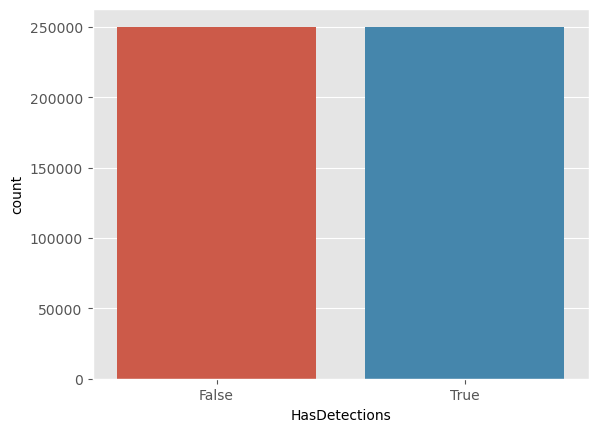

In [254]:
sns.countplot(data=df, x='HasDetections')

### 2.1.7 - 2.1.9. Variables distribution and relations with target<a class="anchor" id="variables_distribution"></a>

    *NUMÉRICAS




In [255]:
#Realizamos un describe para analizar las variables a ser eliminadas.
df[num_cols].describe(exclude='bool').T.sort_values('std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Census_InternalBatteryNumberOfCharges,"484,962.0000","1,125,600,150.2055","1,888,768,455.7796",0.0000,0.0000,0.0000,"4,294,967,295.0000","4,294,967,295.0000"
Census_PrimaryDiskTotalCapacity,"497,024.0000","514,043.3159","370,446.8159","10,240.0000","239,372.0000","476,940.0000","953,869.0000","47,687,668.0000"
Census_SystemVolumeTotalCapacity,"497,024.0000","378,054.6393","338,472.2187","9,689.0000","120,775.0000","249,450.0000","475,981.0000","47,687,100.0000"
Census_OEMModelIdentifier,"494,236.0000","239,128.0469","72,048.8836",1.0000,"189,641.7500","247,520.0000","304,438.0000","345,493.0000"
CityIdentifier,"481,760.0000","81,271.6460","48,985.1297",7.0000,"36,825.0000","82,373.0000","123,939.5000","167,958.0000"
Census_FirmwareVersionIdentifier,"490,939.0000","33,030.9889","21,220.1614",10.0000,"13,156.0000","33,070.0000","52,436.0000","72,091.0000"
AVProductStatesIdentifier,"498,062.0000","47,850.9084","14,023.0853",3.0000,"49,480.0000","53,447.0000","53,447.0000","70,492.0000"
Census_TotalPhysicalRAM,"495,444.0000","6,129.2322","4,964.5213",512.0000,"4,096.0000","4,096.0000","8,192.0000","393,216.0000"
Census_OSBuildRevision,"500,000.0000",967.2248,"2,920.6277",0.0000,165.0000,285.0000,547.0000,"19,069.0000"
OsBuild,"500,000.0000","15,726.9338","2,188.6461","7,600.0000","15,063.0000","16,299.0000","17,134.0000","18,242.0000"


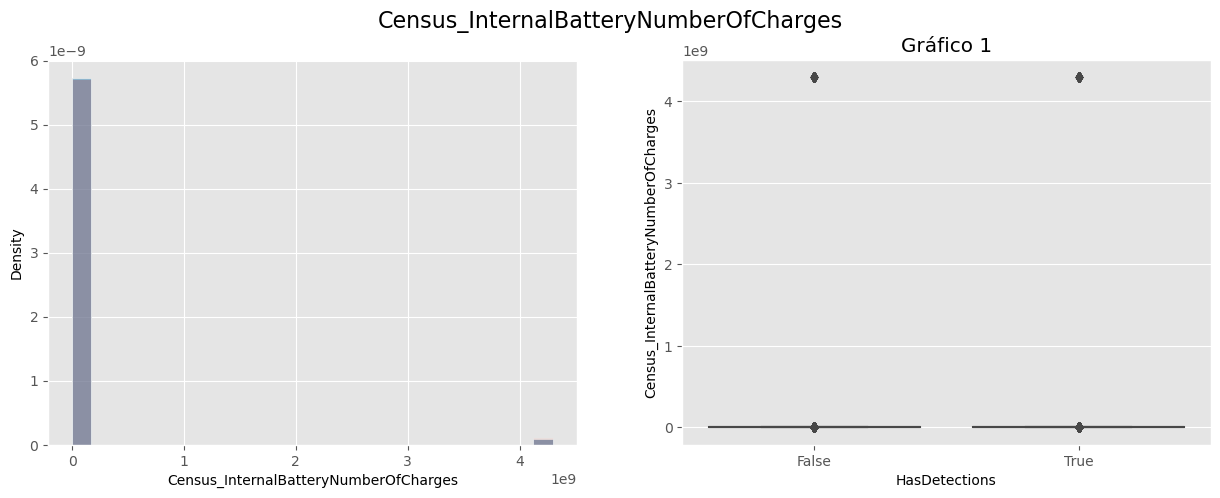

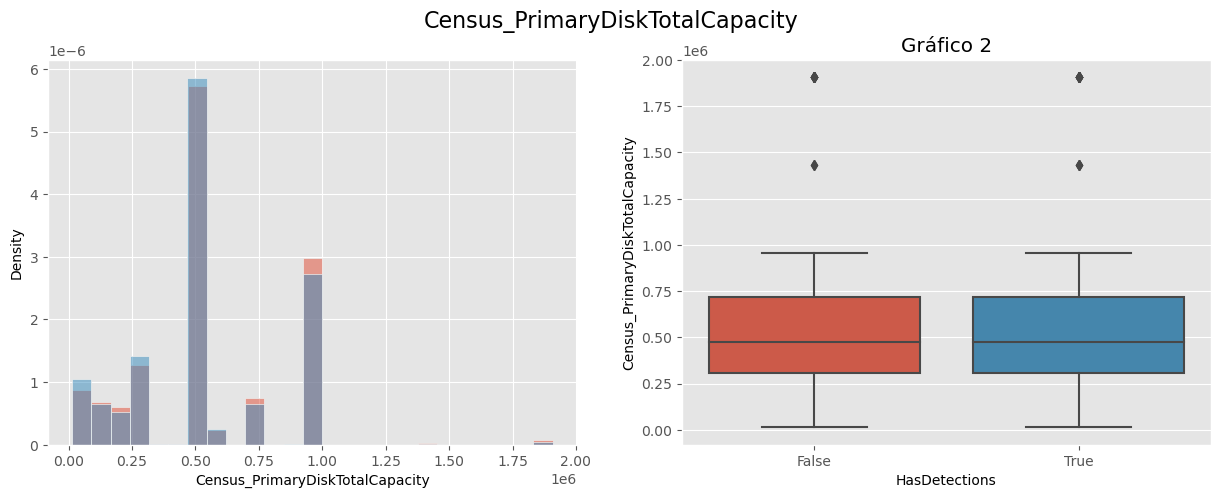

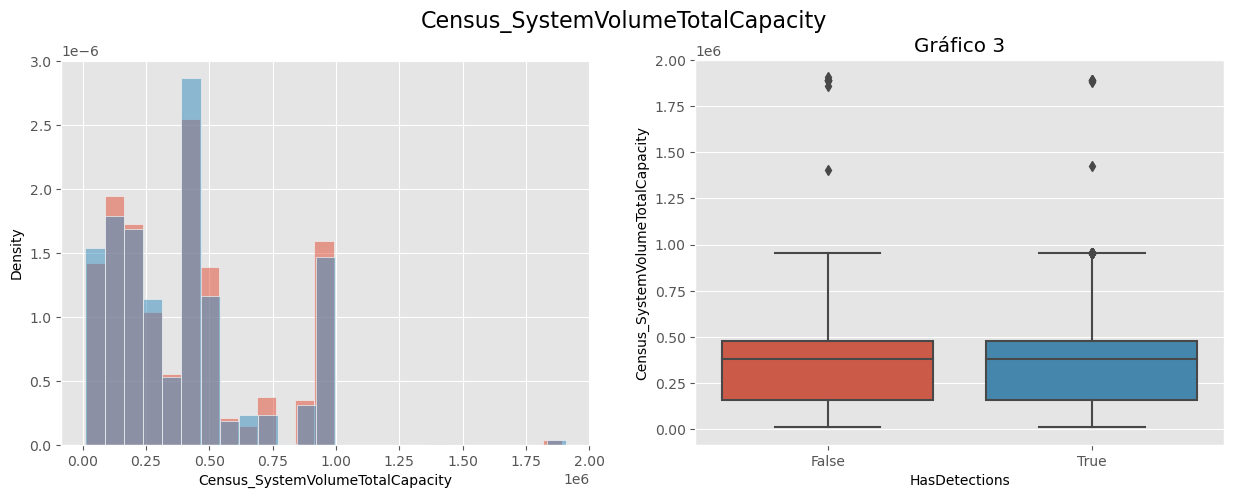

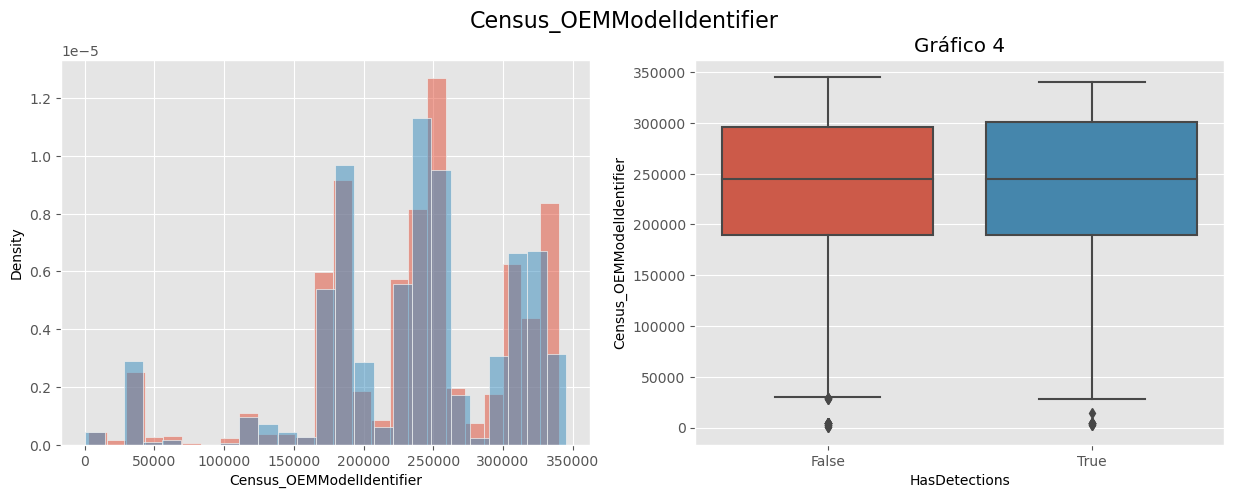

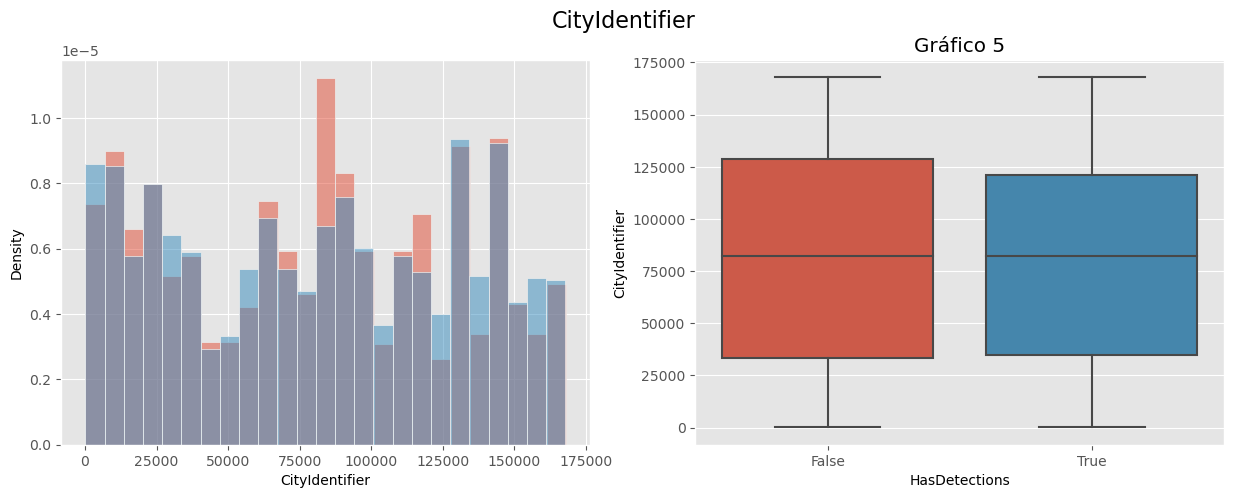

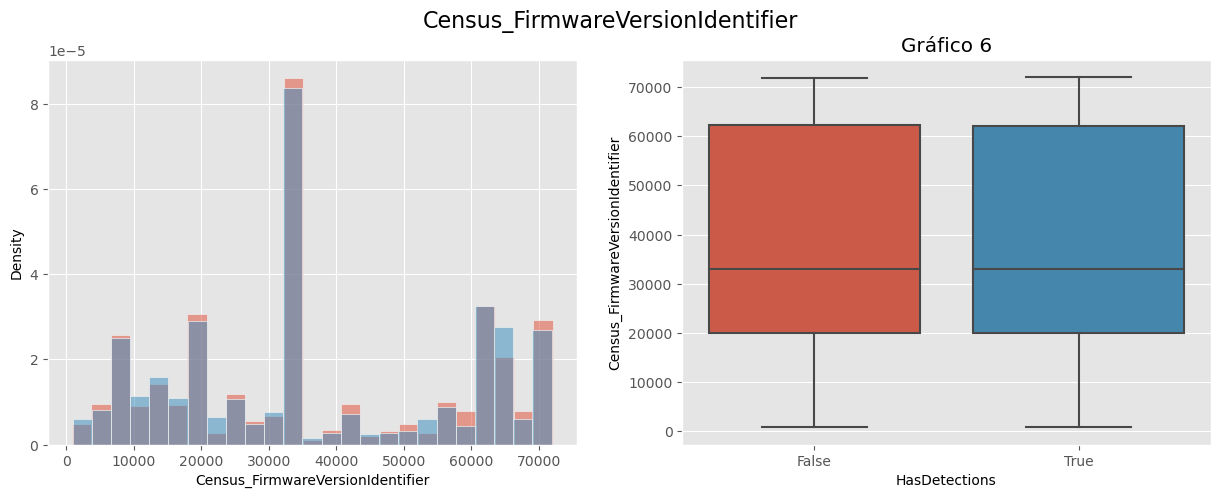

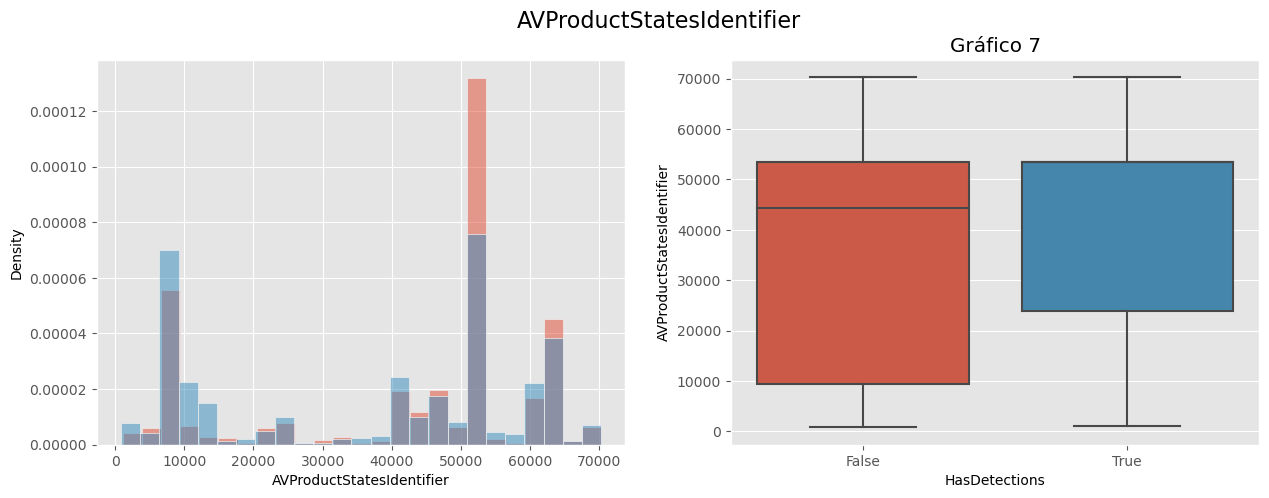

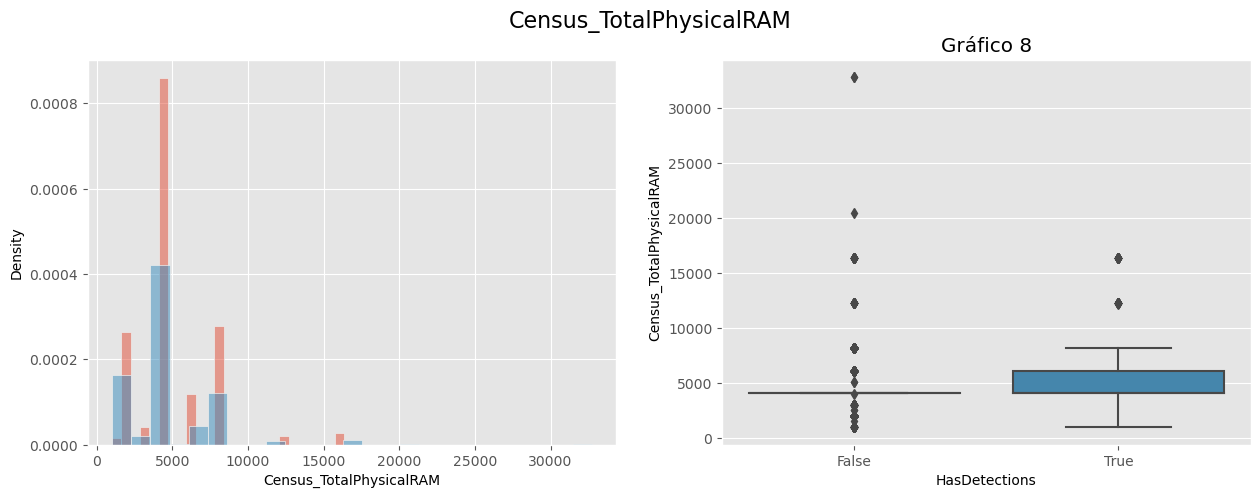

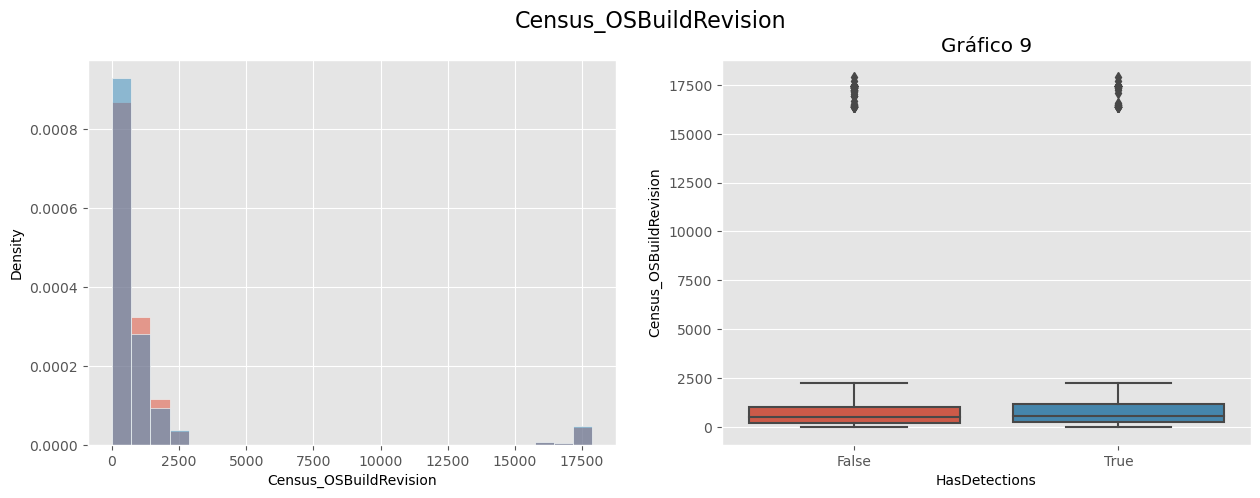

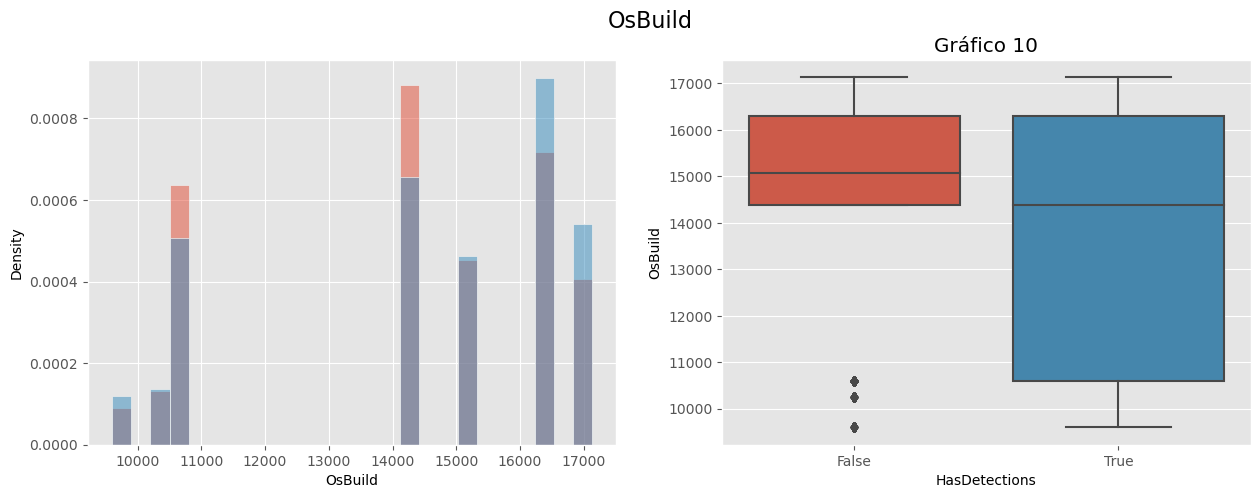

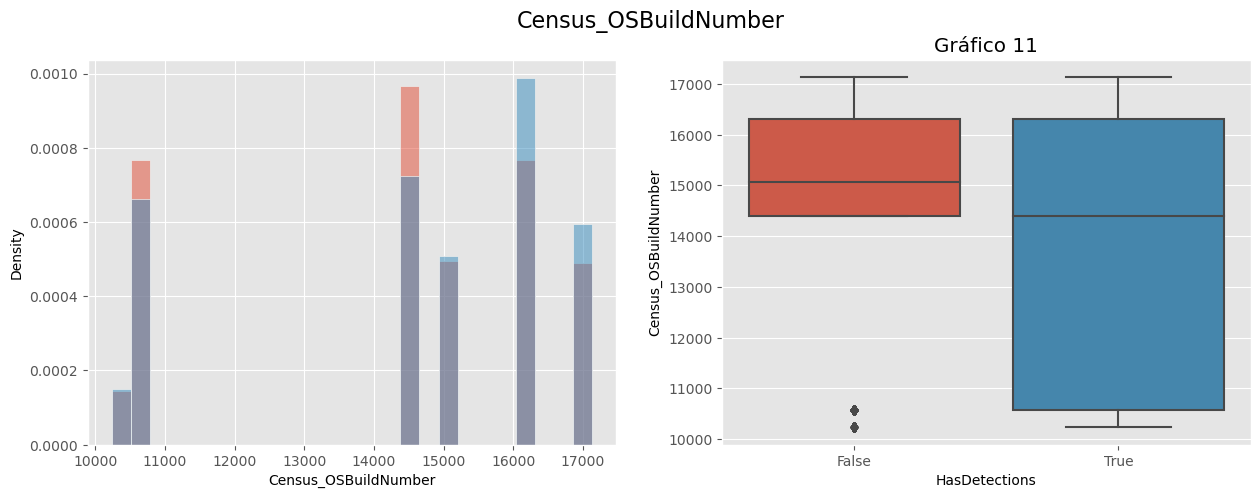

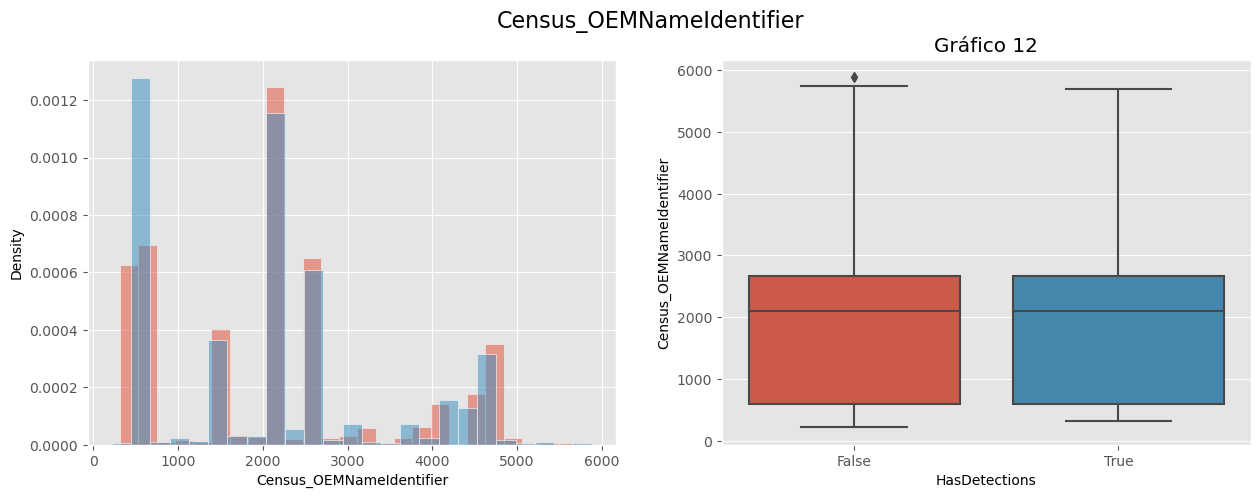

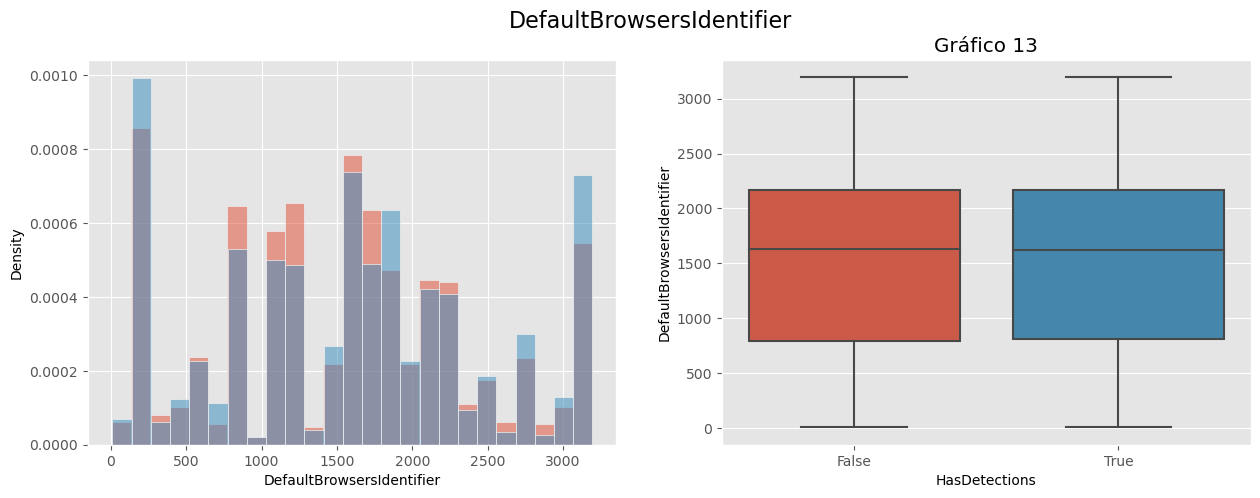

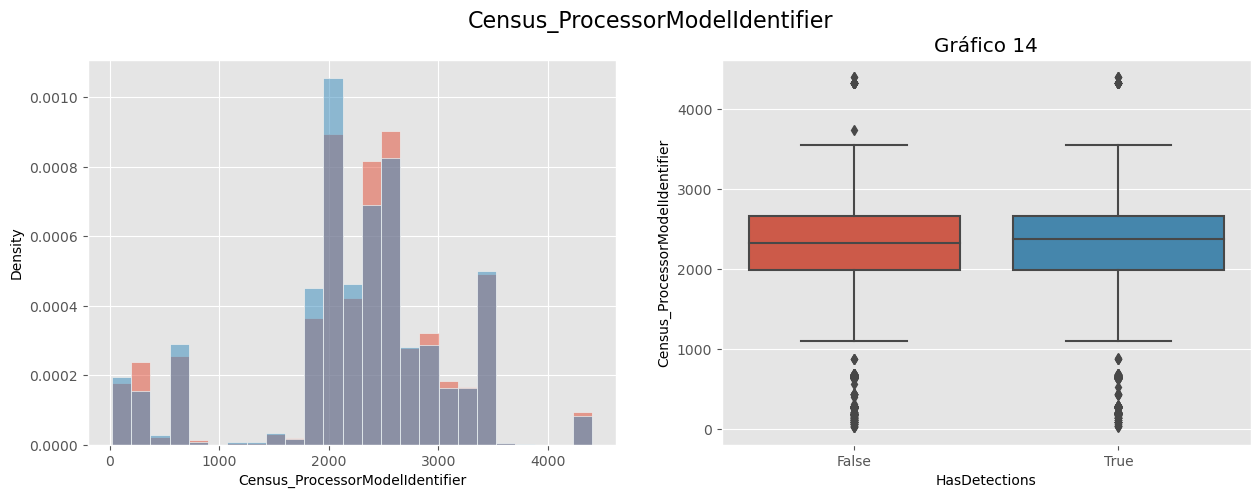

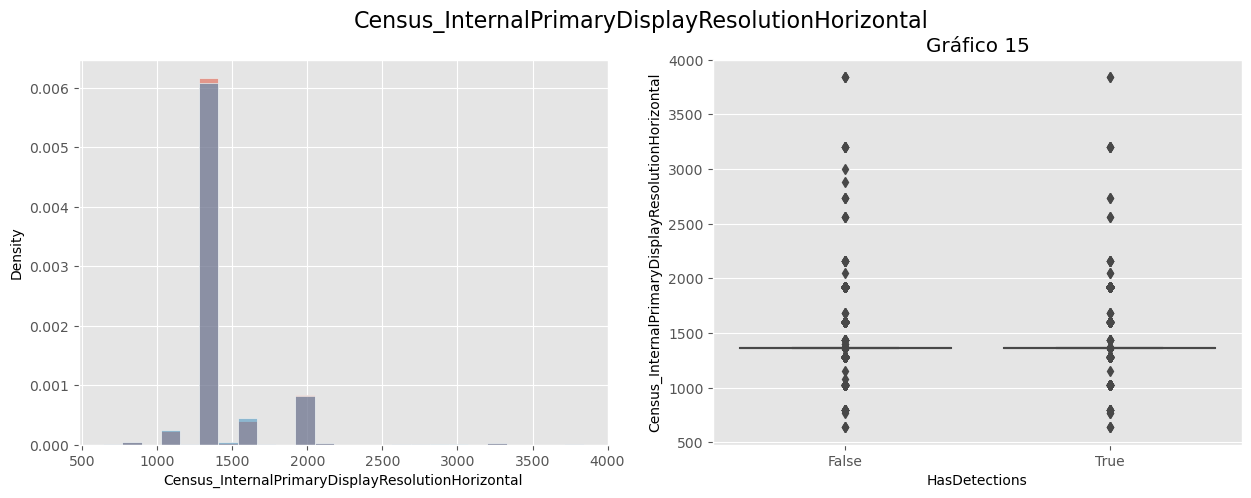

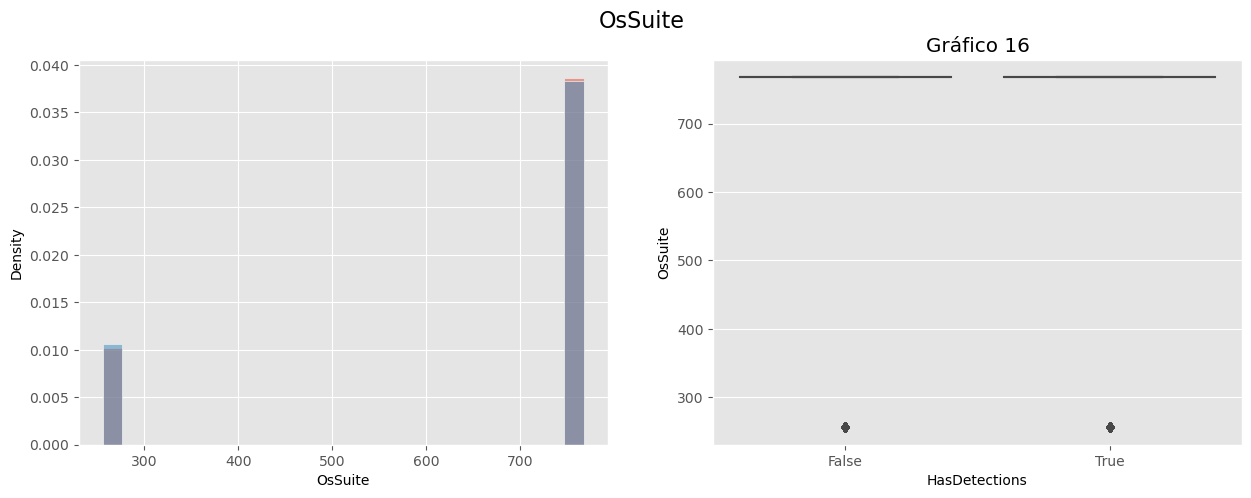

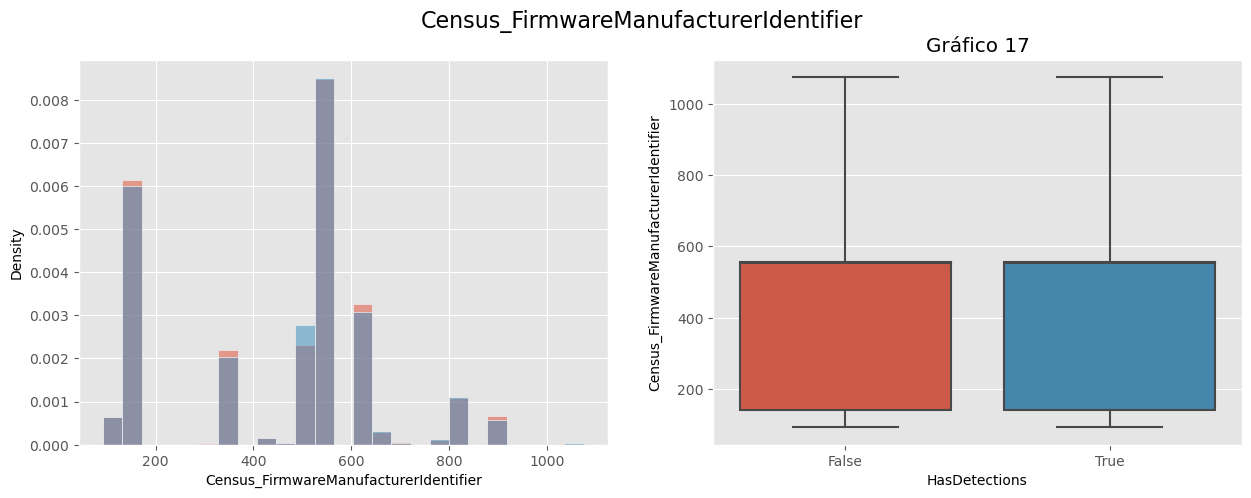

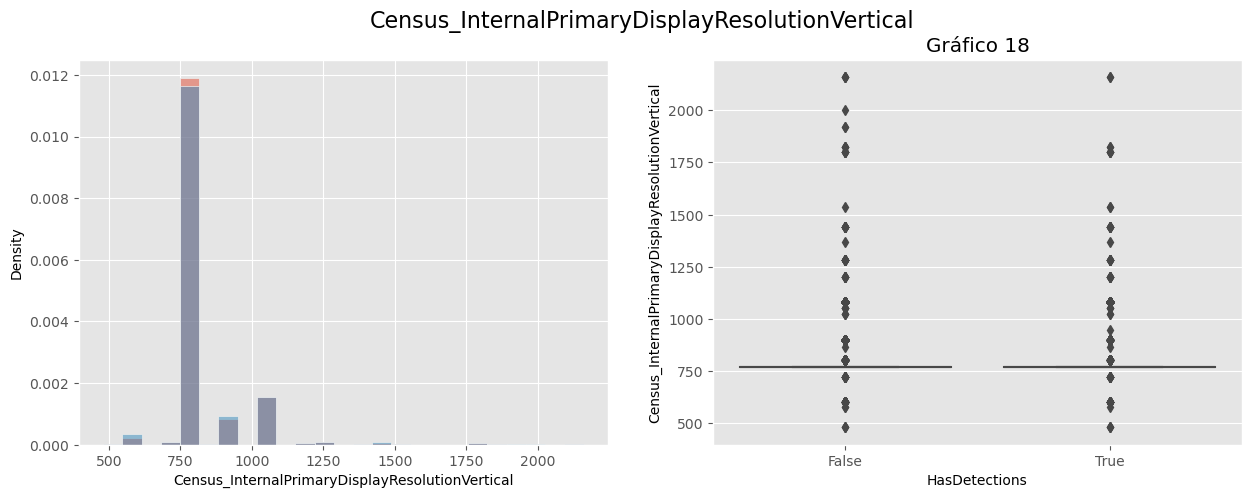

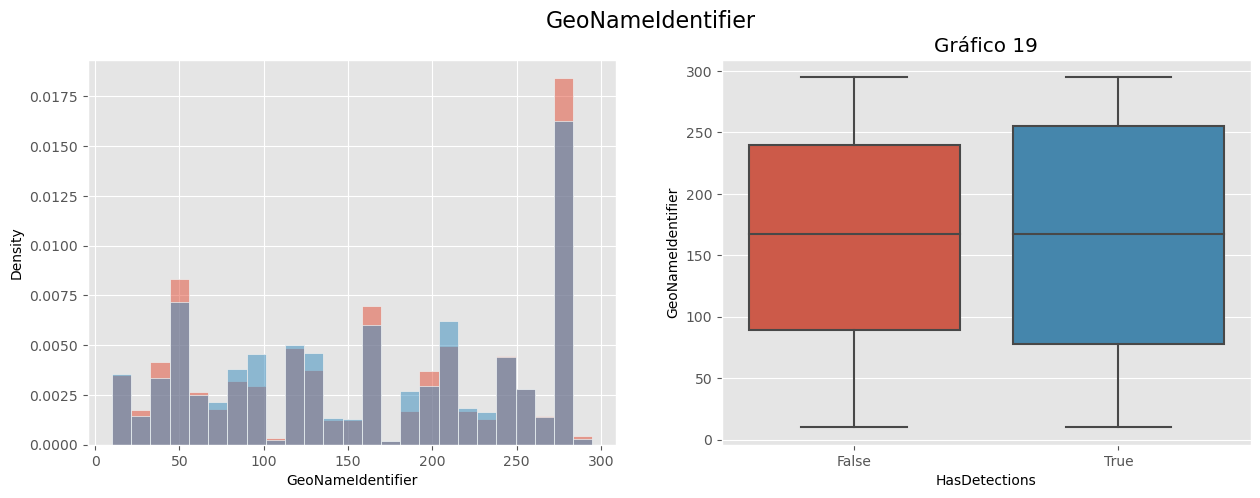

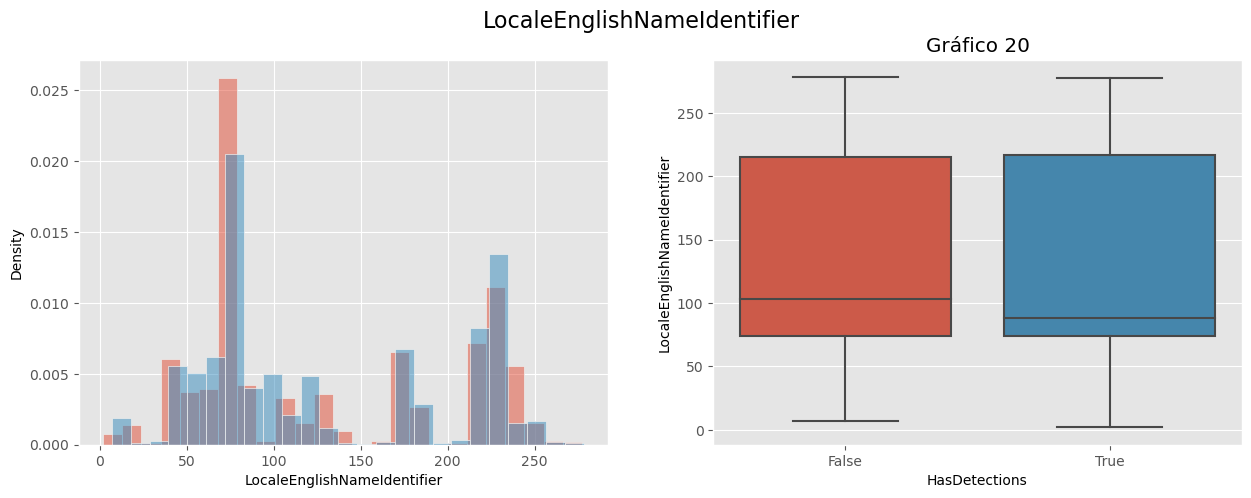

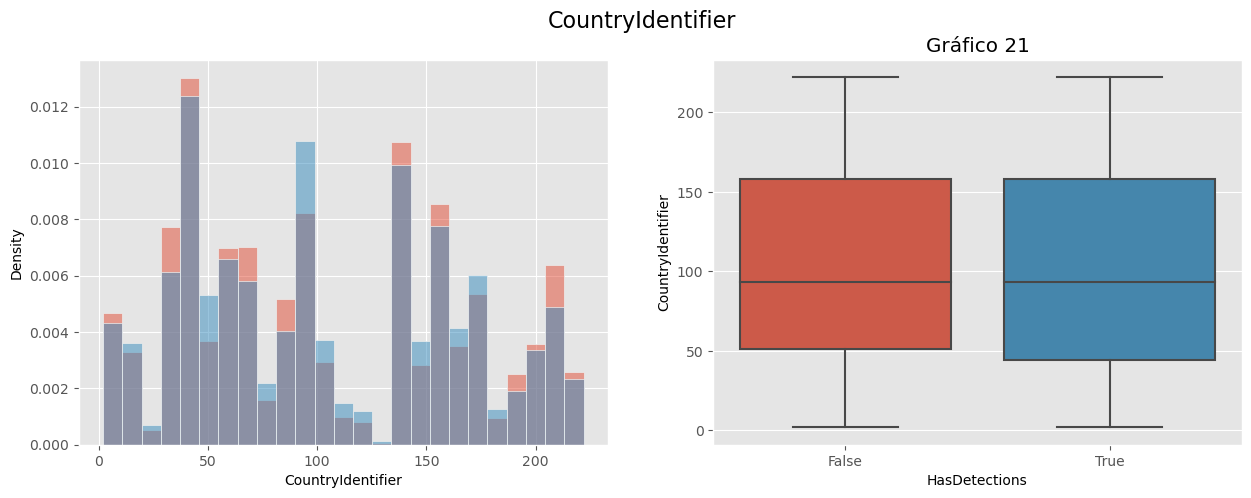

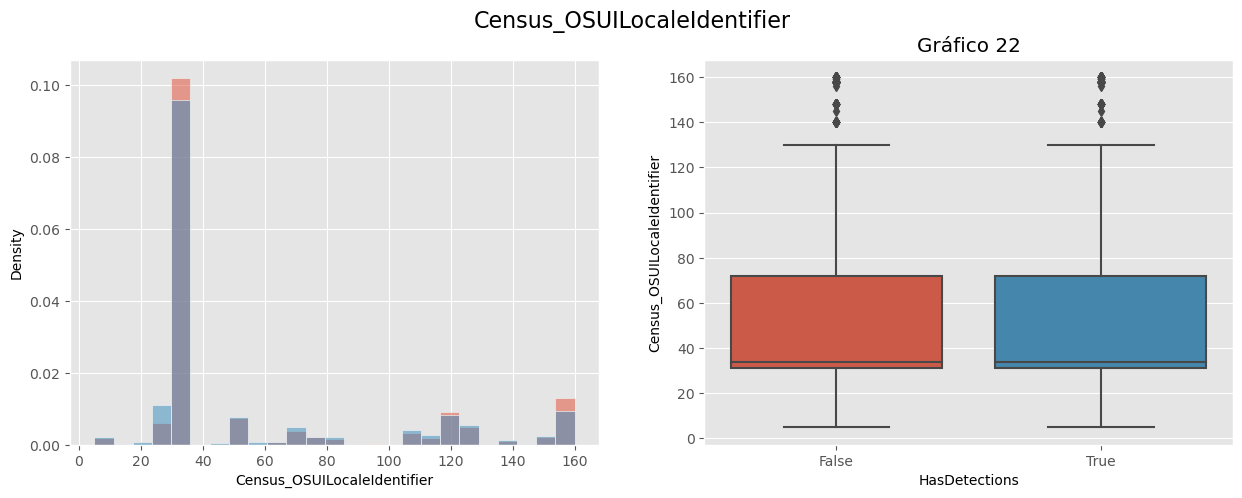

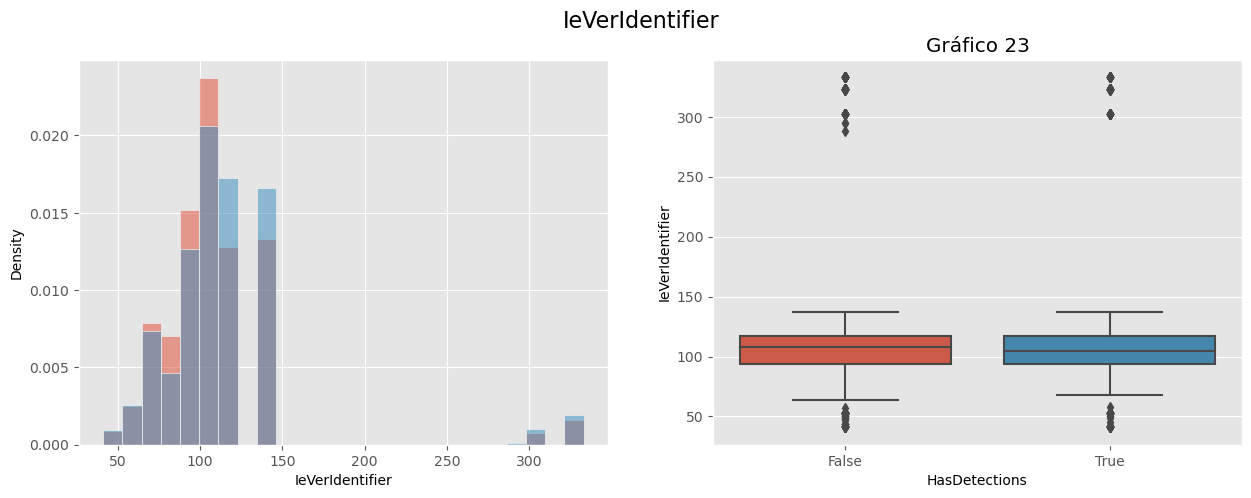

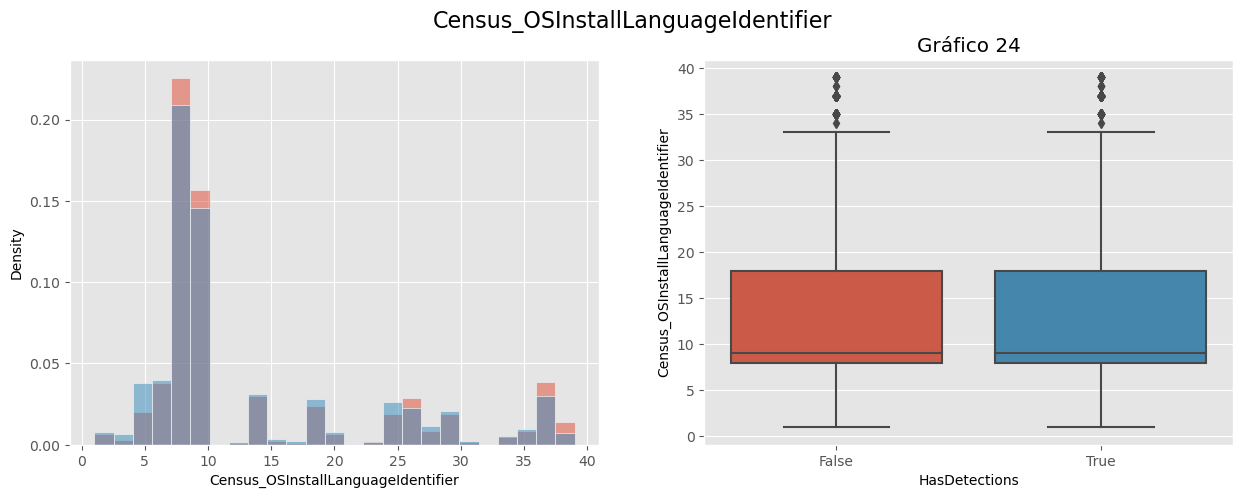

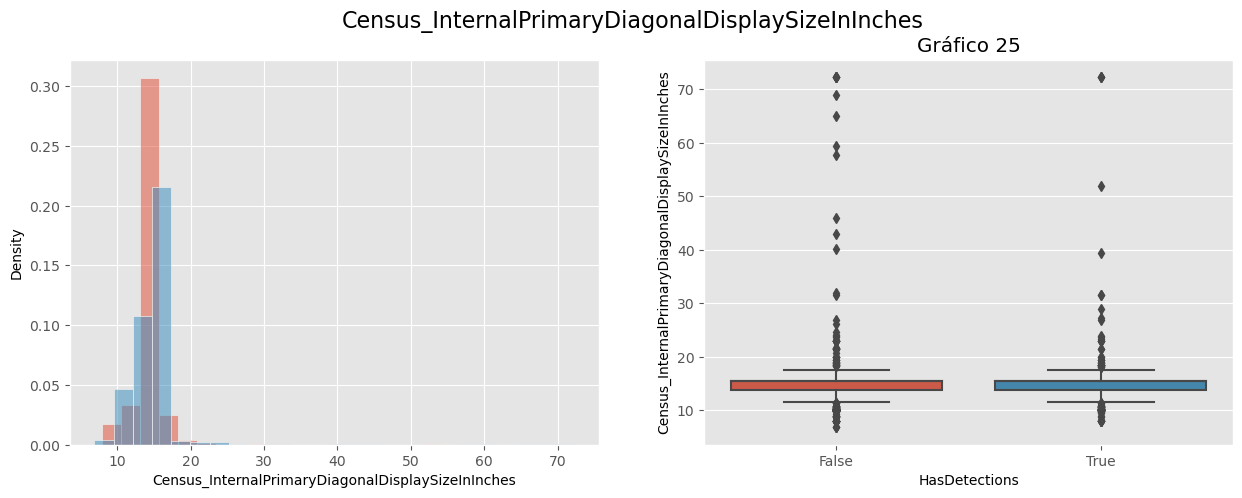

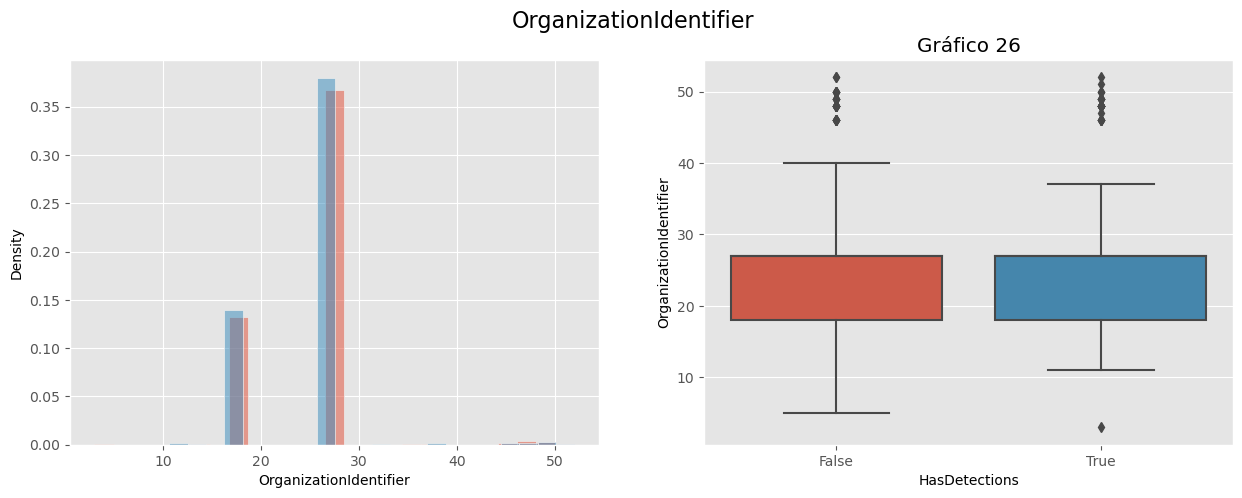

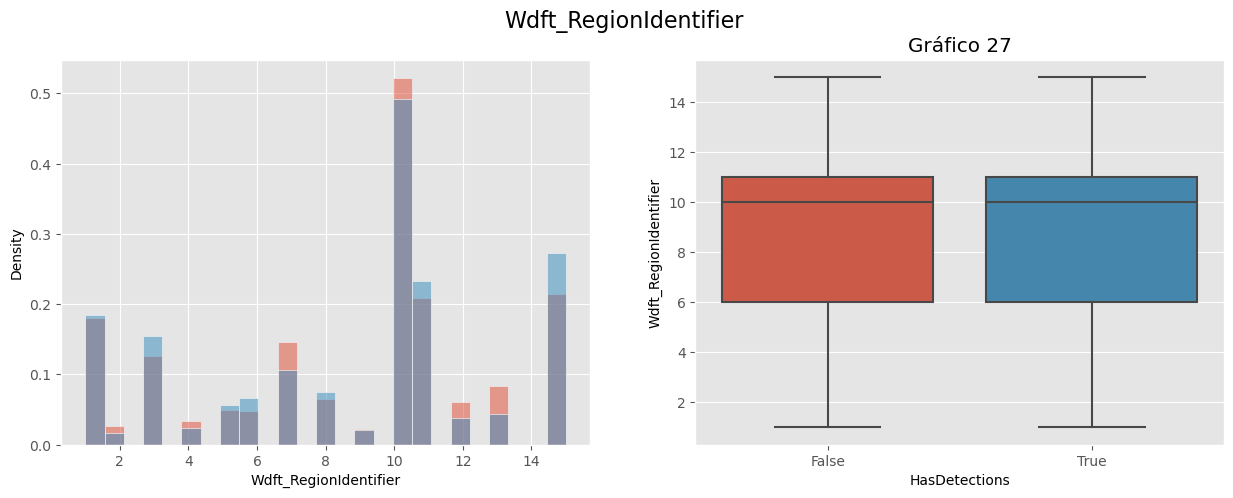

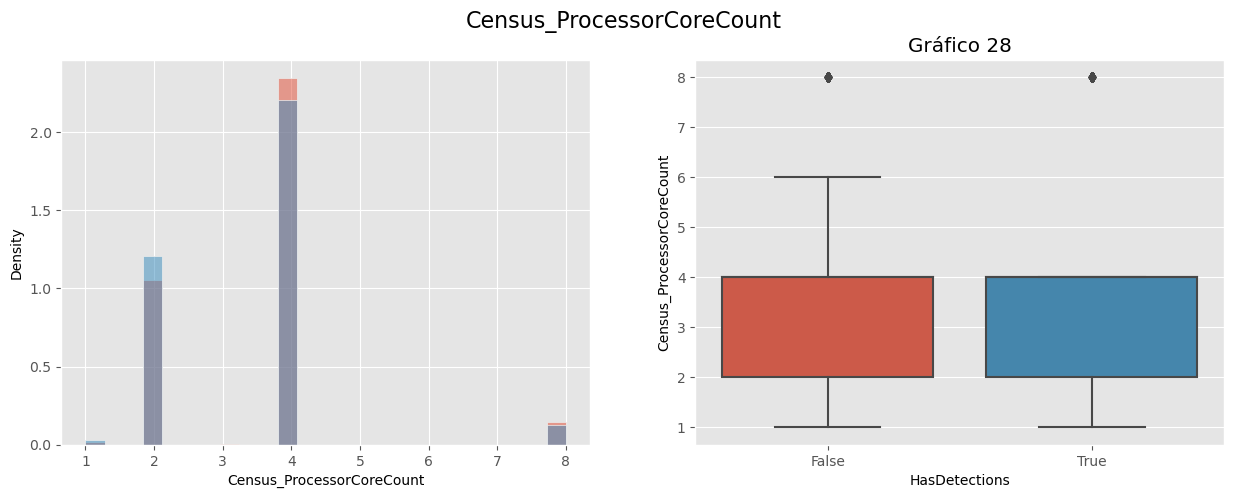

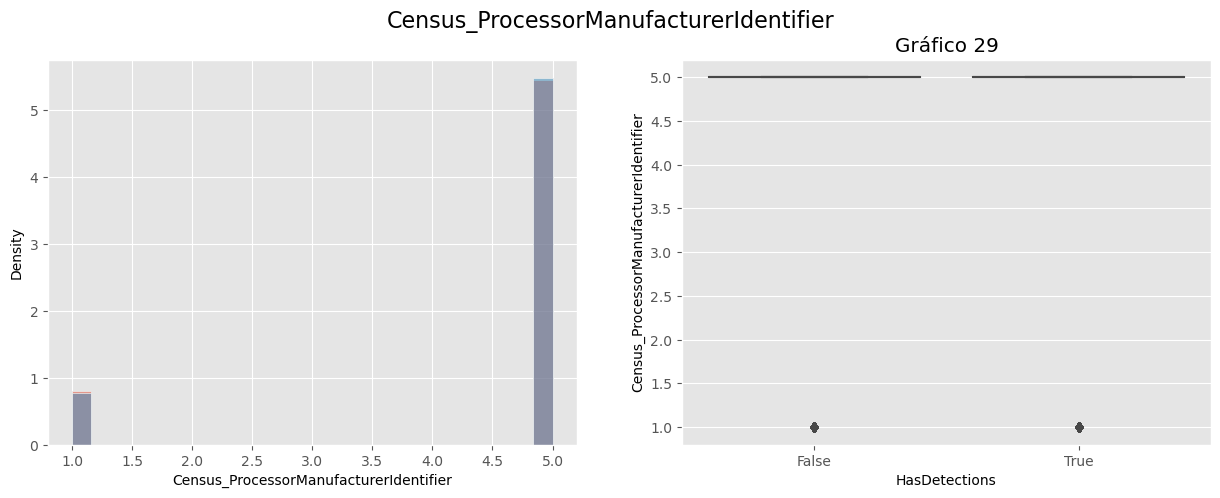

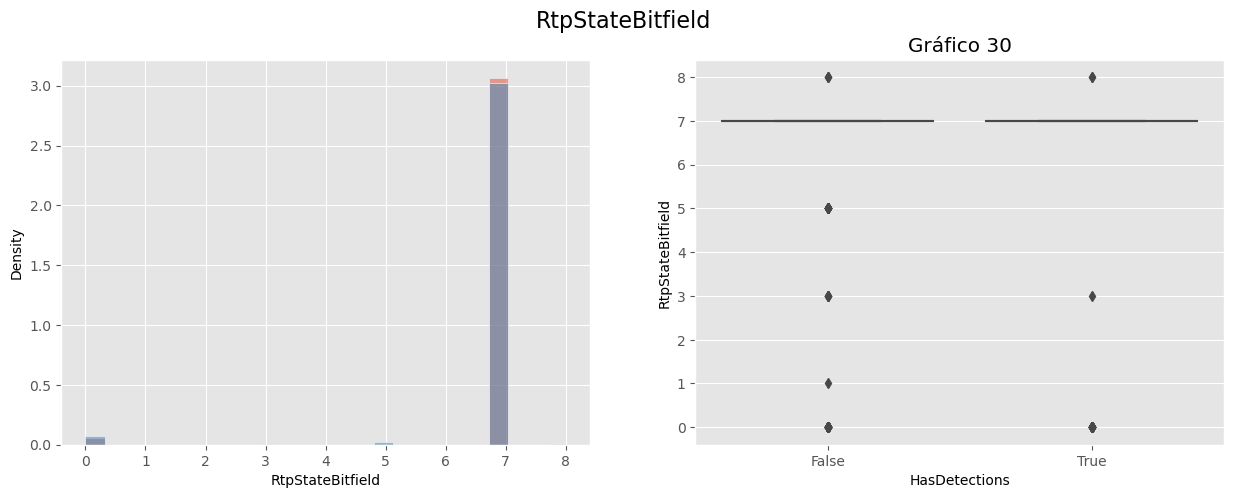

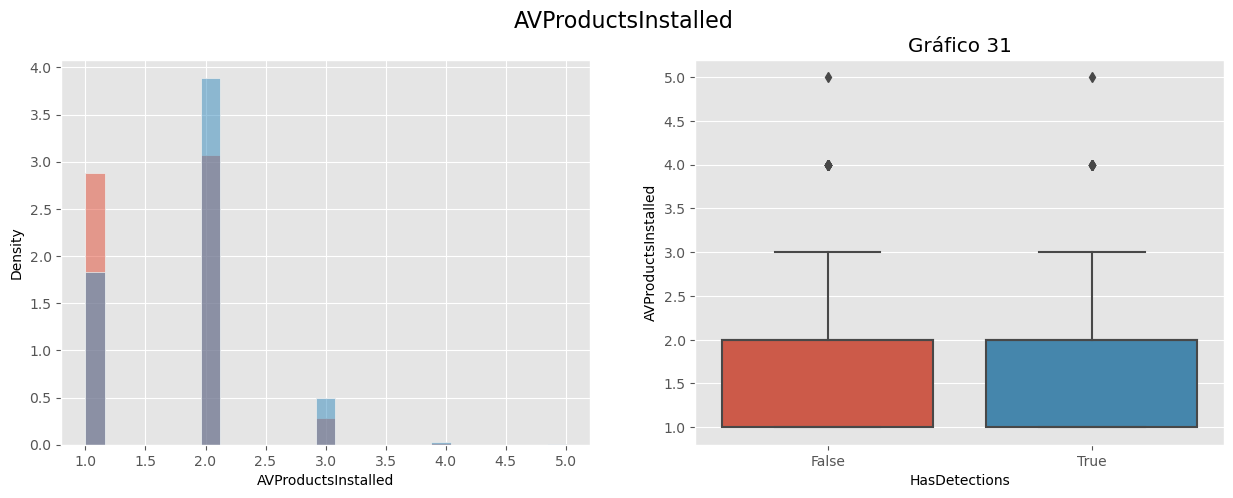

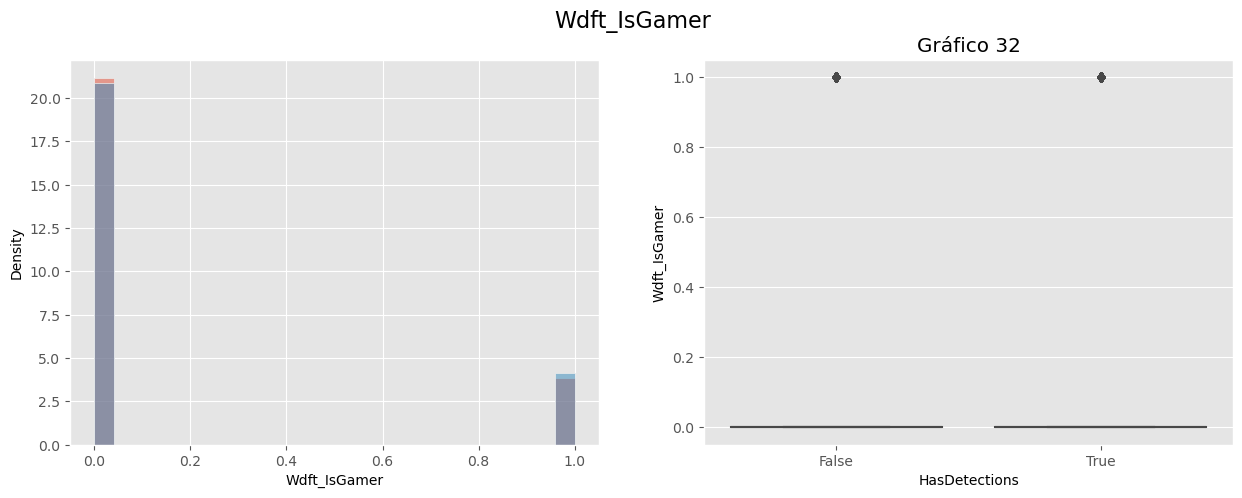

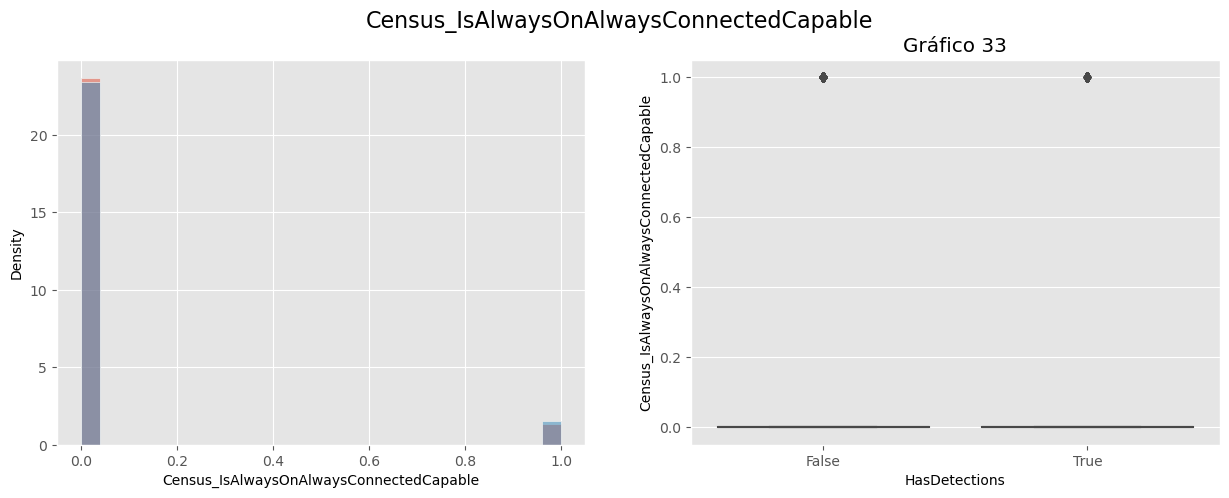

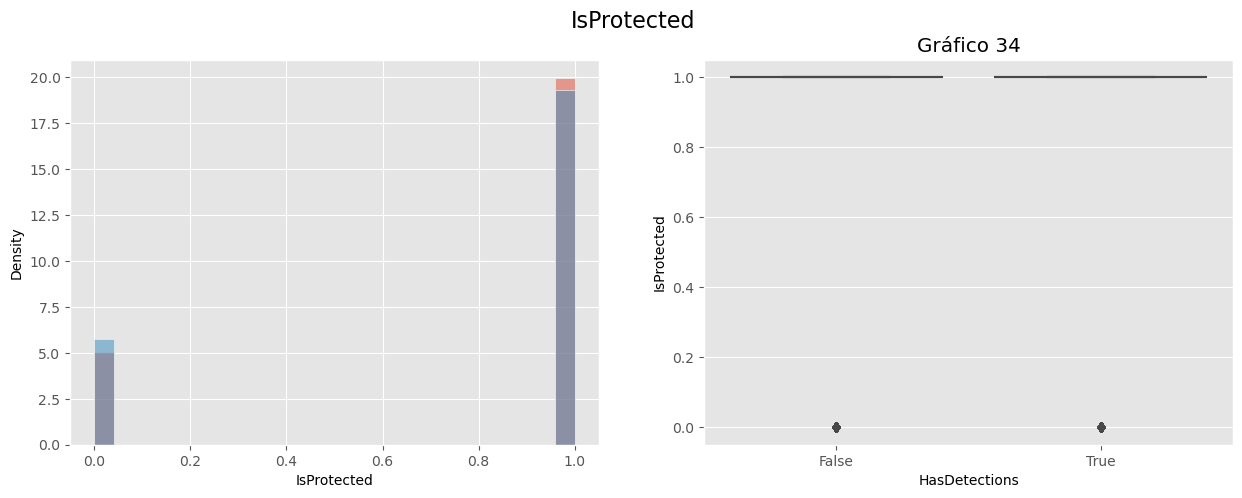

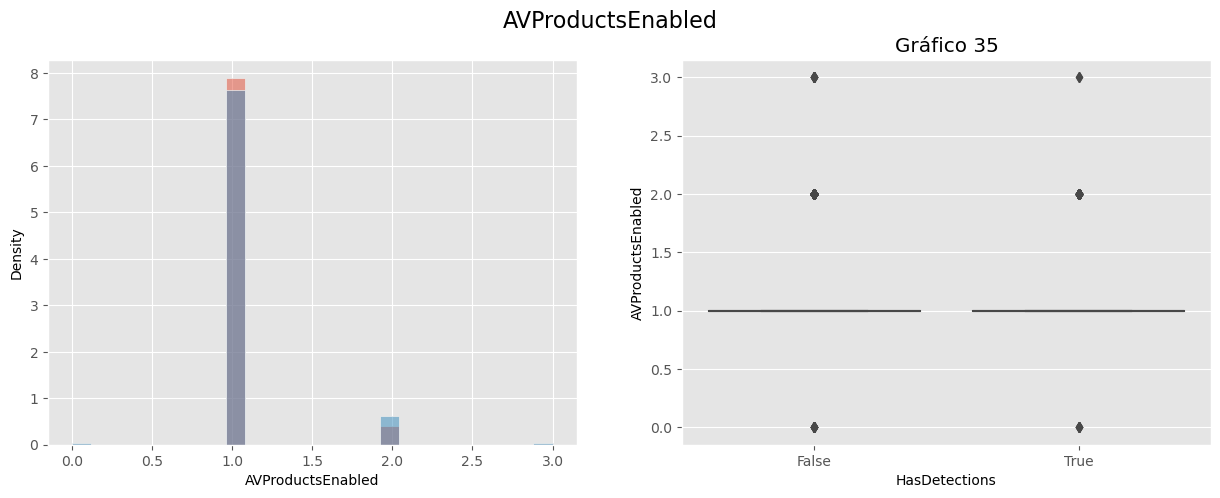

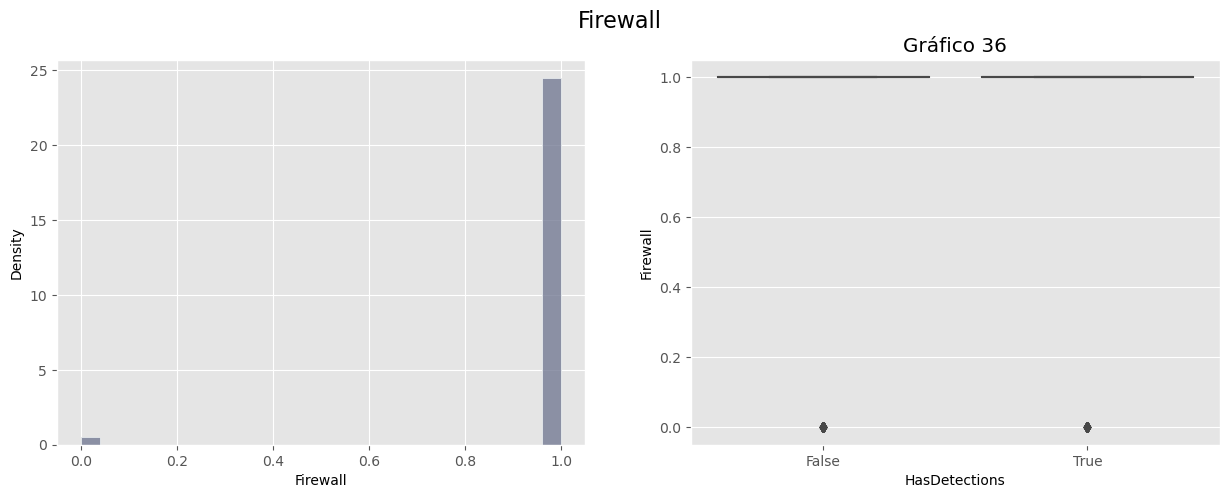

In [256]:
# Dos subgráficos: el de la izquierda son los histogramas superpuestos de los valores de la columna para los casos positivos y negativos
#,Gráfico derecha muestra un boxplot que compara la distribución de los valores entre los casos positivos y negativos.
def plot_hist_and_boxplot_by_target(df, input_name, target_name, hist_stat='count'):
    df_plot = df.copy().dropna()
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(121)

    sns.histplot(data=df_plot.query(f"{target_name} == 1"), x=input_name, bins=25, alpha=.5, stat=hist_stat, ax=ax1)
    sns.histplot(data=df_plot.query(f"{target_name} == 0"), x=input_name, bins=25, alpha=.5, stat=hist_stat, ax=ax1)
    ax2 = fig.add_subplot(122)
    sns.boxplot(data=df_plot, x=target_name, y=input_name, ax=ax2)
    fig.suptitle(f"{input_name}", fontsize=16)

num_cols = list(df.select_dtypes(include=['float', 'int']).columns)
num_cols = [c for c in num_cols if c != TARGET]

# Ordeno num_cols por desviación estándar de mayor a menor
num_cols.sort(key=lambda x: df[x].std(), reverse=True)

# El boxplot de color rojo representa el objetivo (detection = 1)
# El color azul representa los valores correspondientes a la clase no objetivo (detection = 0)
for i, num_col in enumerate(num_cols, 1):
    plot_hist_and_boxplot_by_target(df, input_name=num_col, target_name=TARGET, hist_stat='density')
    plt.title(f"Gráfico {i}")
    plt.show()


                COLUMNAS NUMÉRICAS PARA ELIMINAR
                
                Considera 3 factores: 
                1)Observaciones de los gráficos, las columnas que no tienen relación con el target
                2)Análisis EDA (ydata-profiling)
                3)Análisis de multicolinealidad: Si tienes variables numéricas altamente correlacionadas entre sí, podría haber redundancia en la información que aportan. En tal caso, eliminar una de las variables altamente correlacionadas.

        Graf.1: Census_InternalBatteryNumberOfCharges, elimino: No tiene relación con el target + EDA(highcorrelation+missing+zeros). Multicolinealidad is highly overall correlated with Census_MDC2FormFactor and 3 other fields.

        Graf.13: DefaultBrowsersIdentifier, elimino: EDA (missing 95.2%).
        
        Graf.15: Census_InternalPrimaryDisplayResolutionHorizontal: Tiene mas relación con el target. Multicolinealidad is highly overall correlated with Census_InternalPrimaryDisplayResolutionVertical(Graf.18 elimino). 

        Graf.16: OsSuite, elimino: EDA is highly overall correlated with SkuEdition and 2 other fields

        Graf.18: Census_InternalPrimaryDisplayResolutionVertical, la elimino: is highly overall correlated with Census_InternalPrimaryDisplayResolutionHorizontal. 

        Gráf.19: GeoNameIdentifier: is highly overall correlated with CountryIdentifier

        Graf.21: CountryIdentifier(graf 21) is highly overall correlated with GeoNameIdentifier(este tiene mas relación con el target!).

        Graf.22: Census_OSUILocaleIdentifier, la elimino: is highly overall correlated with Census_OSInstallLanguageIdentifier (graf.24).

        Graf.23: IeVerIdentifier, la elimino: Multicolinealidad is highly overall correlated with OsBuild(graf10, mas relacion con el target). 

        Graf.24: Census_OSInstallLanguageIdentifier: tiene mas densidad y relacion con target. EDA is highly overall correlated with Census_OSUILocaleIdentifier(graf22).

        Graf.28: Census_ProcessorCoreCount: Multicolinealidad is highly overall correlated with Census_TotalPhysicalRAM.

        Graf.29: Census_ProcessorManufacturerIdentifier, la elimino: EDA (high correlation + imbalance). 
        Multicolinealidad  is highly overall correlated with Census_ProcessorModelIdentifier(graf 14) and 2 other fields
        Graf.30: RtpStateBitfield, elimino: EDA (high correlation + zeros)

        Graf.31: AVProductsInstalled: EDA(high correlation + imbalance 56.4%). Multicolinealidad is highly overall correlated with AVProductStatesIdentifier(graf 7)

        Graf.33: Census_IsAlwaysOnAlwaysConnectedCapable, elimino: EDA(high correlation + imbalance 68.4%). Multicolinealidad is highly overall correlated with Census_MDC2FormFactor and 1 other fields. BAja std y mean.

        Graf.34: IsProtected, elimino: EDA(high correlation + imbalance). Multicolinealidad is highly overall correlated with AVProductStatesIdentifier. BAja std y mean.

        Graf.35: AVProductsEnabled, elimino: EDA (imbalanced 91.8%). Baja std y mean.
        
        Graf.36: Firewall: EDA (imbalanced 84.9% + missing). Baja std y mean

In [257]:
#Creo una nueva lista para eliminar columnas:
droppable_features2 = []

#Agrego las columnas numéricas a eliminar: 
droppable_features2.extend([
    'Census_InternalBatteryNumberOfCharges',
    'OsSuite',
    'DefaultBrowsersIdentifier',
    'Census_InternalPrimaryDisplayResolutionVertical',
    'Census_OSUILocaleIdentifier',
    'IeVerIdentifier',
    'Census_ProcessorManufacturerIdentifier',
    'RtpStateBitfield',
    'Census_IsAlwaysOnAlwaysConnectedCapable', 
    'IsProtected',
    'AVProductsEnabled', 
    'Firewall'
])

    *Categóricas



In [258]:
df.describe(include=['object', 'bool']).T.sort_values('unique', ascending=False)

,count,unique,top,freq
AvSigVersion,500000,6455,1.273.1420.0,5771
OsBuildLab,499999,453,17134.1.amd64fre.rs4_release.180410-1804,206436
Census_OSVersion,500000,305,10.0.17134.228,79975
AppVersion,500000,95,4.18.1807.18075,288809
EngineVersion,500000,53,1.1.15200.1,216491
Census_ChassisTypeName,499963,34,Notebook,294232
Census_InternalBatteryType,144397,28,lion,113500
Census_OSEdition,500000,22,Core,194469
OsVer,500000,21,10.0.0.0,483830
Census_OSSkuName,500000,21,CORE,194464


In [259]:
print(cat_cols)
print(df[cat_cols].shape)

['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'IsSxsPassiveMode', 'HasTpm', 'Platform', 'Processor', 'OsVer', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'SmartScreen', 'Census_MDC2FormFactor', 'Census_PrimaryDiskTypeName', 'Census_HasOpticalDiskDrive', 'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', 'Census_InternalBatteryType', 'Census_OSVersion', 'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_FlightRing', 'Census_IsSecureBootEnabled', 'Census_IsTouchEnabled', 'Census_IsPenCapable', 'HasDetections']
(500000, 33)


COLUMNAS Categóricas PARA ELIMINAR
                
                Considera 3 factores: 
                1)Observaciones de los gráficos, las columnas que no tienen relación con el target
                2)Análisis EDA (ydata-profiling)
                3)Análisis de multicolinealidad 

    Graf.8: Census_OSEdition, elimino: Multicolinealidad is highly correlated with OsSuite. EDA imbalance 58.7%.
    
    Graf.9: OSVer, la elimino: Multicolinealidad is highly correlated with OsSuite. EDA imbalance 94.6%.

    Graf.18. Census_FlightRing, elimino: Multicolinealidad is highly correlated with Census_OSBuildNumber. EDA imbalance 85.7%.

    Graf.24. ProductName, elimino: Multicolinealidad is highly correlated with AVProductStatesIdentifier. EDA imbalance 94,6%.

    Graf.25. Processor, elimino: Multicolinealidad is highly correlated with Census_ProcessorManufacturerIdentifier. EDA imbalance 72.2%.

    Graf.26. Census_OSArchitecture, elimino: Multicolinealidad is highly correlated with Processor. EDA imbalance 72%.

    Graf.27. IsSxsPassiveMode, elimino: Multicolinealidad is highly correlated with RtpStateBitfield. EDA imbalance 87.4%.

    Graf.28. HasTpm, elimino: Multicolinealidad is highly correlated with AVProductStatesIdentifier. EDA imbalance 90.5%.

    Graf.31. Census_IsTouchEnabled, elimino: Multicolinealidad is highly correlated with Census_MDC2FormFactor. 
    
    Graf.32. Census_IsPenCapable, elimino: Multicolinealidad is highly correlated with Census_MDC2FormFactor. EDA imbalance 76.8%.

In [260]:
#hacemos una funcion para ver aquellas variables que estoy muy correlacionadas/descorrelacionadas. 
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(df, .8)

/var/folders/rl/7bt84j4j31gg1ssp767d9xgm0000gn/T/ipykernel_80319/2788420845.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  xCorr = x.corr()


RtpStateBitfield                                   IsSxsPassiveMode                                  -0.8856
Census_InternalPrimaryDisplayResolutionHorizontal  Census_InternalPrimaryDisplayResolutionVertical    0.8982
OsBuild                                            Census_OSBuildNumber                               0.9377
Census_OSInstallLanguageIdentifier                 Census_OSUILocaleIdentifier                        0.9885
RtpStateBitfield                                   RtpStateBitfield                                      NaN
dtype: float64

In [261]:
#Agrego las columnas categóricas a eliminar: 
droppable_features2.extend([
    'Census_OSEdition',
    'OsVer',
    'Census_FlightRing',
    'ProductName',
    'Processor',
    'Census_OSArchitecture',
    'IsSxsPassiveMode',
    'HasTpm',
    'Census_IsTouchEnabled',
    'Census_IsPenCapable',
    'Census_OSBuildNumber'
])

In [262]:
droppable_features2

['Census_InternalBatteryNumberOfCharges',
 'OsSuite',
 'DefaultBrowsersIdentifier',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_OSUILocaleIdentifier',
 'IeVerIdentifier',
 'Census_ProcessorManufacturerIdentifier',
 'RtpStateBitfield',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'IsProtected',
 'AVProductsEnabled',
 'Firewall',
 'Census_OSEdition',
 'OsVer',
 'Census_FlightRing',
 'ProductName',
 'Processor',
 'Census_OSArchitecture',
 'IsSxsPassiveMode',
 'HasTpm',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable',
 'Census_OSBuildNumber']

In [263]:
corr=df.corr()
corr.style.background_gradient(cmap="coolwarm")

/var/folders/rl/7bt84j4j31gg1ssp767d9xgm0000gn/T/ipykernel_80319/3516838904.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,IeVerIdentifier,Firewall,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
RtpStateBitfield,1.000000,-0.885639,-0.004962,0.105237,-0.183095,0.009346,-0.007860,0.011350,-0.001190,0.004990,0.018069,0.006882,-0.027464,-0.011023,0.060631,-0.023449,0.006215,0.003448,0.000081,-0.018380,0.003625,-0.005396,-0.026347,-0.019181,-0.010053,-0.023076,-0.012444,-0.016916,-0.010796,-0.005590,-0.033989,0.024159,-0.014009,-0.013738,0.009963,0.005886,-0.016266,0.009711,0.006366,0.020115,-0.024648,-0.001504,0.040304
IsSxsPassiveMode,-0.885639,1.000000,0.012028,-0.110956,0.194294,0.027948,0.013870,-0.011686,0.000591,-0.004700,-0.018672,-0.012320,0.045279,0.016242,-0.033295,-0.004239,-0.000927,-0.004793,0.000010,0.023228,0.000769,0.008502,0.021589,0.016353,0.010481,0.026987,0.009528,0.022267,0.015532,0.001066,0.043867,-0.023590,0.011113,0.010585,-0.010323,-0.007070,0.020660,-0.005630,-0.003095,-0.015879,0.031757,0.001163,-0.034038
DefaultBrowsersIdentifier,-0.004962,0.012028,1.000000,0.004171,-0.002898,-0.003407,-0.013139,-0.001054,0.002879,0.005629,-0.020074,0.035982,-0.044086,0.057070,0.019045,-0.057355,0.014369,-0.030262,-0.022665,0.001428,-0.012479,-0.010970,0.038187,0.058940,-0.024088,0.014567,-0.023323,0.008975,0.002951,-0.054322,-0.048266,-0.020446,0.003371,0.002013,0.010240,0.029571,0.069342,0.011398,0.005897,-0.000176,0.010875,0.019271,0.000956
AVProductStatesIdentifier,0.105237,-0.110956,0.004171,1.000000,-0.631974,-0.124388,0.141697,0.006808,-0.004896,0.010980,0.019346,-0.080393,0.002206,-0.058716,-0.145386,-0.072192,0.000621,0.012875,0.015949,0.056853,0.030708,0.021526,-0.073844,-0.087962,-0.051213,0.038034,0.003237,0.049058,0.061876,0.021416,-0.020895,0.025979,0.019178,0.017677,-0.011726,-0.016692,-0.033410,0.040902,0.034613,0.063479,-0.022680,-0.019618,0.116163
AVProductsInstalled,-0.183095,0.194294,-0.002898,-0.631974,1.000000,0.285393,0.023991,-0.023788,0.006300,-0.013779,-0.051085,0.042386,0.006207,0.180917,-0.024436,-0.030873,-0.002352,-0.062399,-0.053217,-0.053292,-0.021945,-0.039305,0.110694,0.142389,0.029693,-0.037057,-0.040015,-0.037065,-0.070466,-0.088383,-0.004214,-0.017163,0.006246,0.005507,0.055029,0.039543,0.214490,-0.013707,-0.027900,-0.070321,0.018622,0.033251,-0.148761
AVProductsEnabled,0.009346,0.027948,-0.003407,-0.124388,0.285393,1.000000,-0.050115,-0.018726,0.006127,-0.008017,-0.024806,-0.017845,-0.089315,0.030638,0.082618,0.105346,-0.004281,-0.005657,-0.027060,-0.003428,-0.002877,-0.002532,0.025626,0.017576,0.002964,-0.003448,-0.002036,0.000488,-0.005487,-0.012585,-0.069927,0.014229,0.033126,0.033049,0.012492,-0.004201,0.036867,-0.003232,-0.007318,-0.019963,-0.012507,0.004708,-0.041943
HasTpm,-0.007860,0.013870,-0.013139,0.141697,0.023991,-0.050115,1.000000,0.004655,-0.007757,-0.000125,0.001972,0.000364,0.365613,0.025699,-0.008737,-0.462698,0.006971,-0.018163,-0.007196,0.025630,0.004140,-0.011806,0.009576,0.007489,0.005763,0.025245,-0.007611,0.030442,0.019816,0.030444,0.207146,0.018167,-0.013168,-0.012786,-0.000854,0.009166,0.087262,0

## MLC3: Data Preparation<a class="anchor" id="data_preparation"></a>

### MLC3.1: Data Cleaning<a class="anchor" id="data_cleaning"></a>

### 3.1.1. Dealing with variable types<a class="anchor" id="dealing_variable_types"></a>

#### From numeric to categorical

There are two important parameters in the drop function:
1. **axis**: Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).
2. **inplace**: If False, return a copy. Otherwise, do operation inplace and return None.

In [264]:
#Imprimo la lista de columnas a eliminar:
droppable_features2

for i, feature in enumerate(droppable_features2, 1):
    print(f"{i}. {feature}")

1. Census_InternalBatteryNumberOfCharges
2. OsSuite
3. DefaultBrowsersIdentifier
4. Census_InternalPrimaryDisplayResolutionVertical
5. Census_OSUILocaleIdentifier
6. IeVerIdentifier
7. Census_ProcessorManufacturerIdentifier
8. RtpStateBitfield
9. Census_IsAlwaysOnAlwaysConnectedCapable
10. IsProtected
11. AVProductsEnabled
12. Firewall
13. Census_OSEdition
14. OsVer
15. Census_FlightRing
16. ProductName
17. Processor
18. Census_OSArchitecture
19. IsSxsPassiveMode
20. HasTpm
21. Census_IsTouchEnabled
22. Census_IsPenCapable
23. Census_OSBuildNumber


In [265]:
# Elimino duplicados en la lista droppable_features2
droppable_features2 = list(set(droppable_features2))

# Elimino las columnas del DataFrame
df.drop(columns=droppable_features2, inplace=True)

# Crear un nuevo índice
df.reset_index(drop=True, inplace=True)

In [266]:
df.shape

(500000, 46)

In [267]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 46 entries, EngineVersion to HasDetections
dtypes: bool(3), float64(19), int64(4), object(20)
memory usage: 165.5+ MB


### 3.1.2. Imputation of null values<a class="anchor" id="nulls_imputation"></a>

#### Imputation of null values in categorical variables
##### Imputation of null values in numeric variables

Para completar los valores faltantes en las columnas que tienen más del 10% de valores faltantes

In [268]:
# Para Nan Values
null_counts = df.isnull().sum()
null_counts = null_counts / df.shape[0]
null_counts[null_counts > 0.1]

OrganizationIdentifier       0.3091
SmartScreen                  0.3572
Census_InternalBatteryType   0.7112
dtype: float64

In [271]:
# La columna: SmartScreen
df.SmartScreen.value_counts(dropna=True) / df.shape[0]

RequireAdmin   0.4832
ExistsNotSet   0.1170
Off            0.0208
Warn           0.0151
Prompt         0.0039
Block          0.0025
off            0.0001
On             0.0001
&#x02;         0.0000
&#x01;         0.0000
on             0.0000
requireadmin   0.0000
Name: SmartScreen, dtype: float64

In [272]:
trans_dict = {
    '&#x02;': 'X02', 
    'off': 'Off', 
    '&#x01;': 'X01', 
    'requireadmin': 'RequireAdmin', 
    'on': 'On',
    np.nan: 'NoExist'
}
df.replace({'SmartScreen': trans_dict}, inplace = True)

In [273]:
#La columna: OrganizationIdentifier
df.OrganizationIdentifier.value_counts(dropna=False) / df.shape[0]

27.0000   0.4698
NaN       0.3091
18.0000   0.1977
48.0000   0.0073
50.0000   0.0051
37.0000   0.0021
11.0000   0.0021
49.0000   0.0015
46.0000   0.0013
14.0000   0.0005
32.0000   0.0005
36.0000   0.0004
52.0000   0.0003
33.0000   0.0003
2.0000    0.0003
5.0000    0.0002
40.0000   0.0002
28.0000   0.0002
4.0000    0.0002
10.0000   0.0001
51.0000   0.0001
1.0000    0.0001
20.0000   0.0001
8.0000    0.0001
6.0000    0.0001
31.0000   0.0000
47.0000   0.0000
39.0000   0.0000
22.0000   0.0000
3.0000    0.0000
21.0000   0.0000
16.0000   0.0000
19.0000   0.0000
29.0000   0.0000
42.0000   0.0000
7.0000    0.0000
44.0000   0.0000
26.0000   0.0000
43.0000   0.0000
45.0000   0.0000
41.0000   0.0000
35.0000   0.0000
23.0000   0.0000
25.0000   0.0000
17.0000   0.0000
Name: OrganizationIdentifier, dtype: float64

In [274]:
#Reemplazo por cero los NA/unknown values 
df.replace({'OrganizationIdentifier': {np.nan: 0}}, inplace=True)

In [275]:
#Census_InternalBatteryType:
pd.options.display.max_rows=99
df.Census_InternalBatteryType.value_counts(dropna=False) / df.shape[0]

NaN    0.7112
lion   0.2270
li-i   0.0277
#      0.0204
lip    0.0067
liio   0.0036
li p   0.0009
li     0.0007
nimh   0.0005
real   0.0003
bq20   0.0003
pbac   0.0003
vbox   0.0002
lgi0   0.0001
unkn   0.0000
lipo   0.0000
lhp0   0.0000
ithi   0.0000
4cel   0.0000
ram    0.0000
lipp   0.0000
batt   0.0000
bad    0.0000
virt   0.0000
a132   0.0000
lgl0   0.0000
li-l   0.0000
icp3   0.0000
3ion   0.0000
Name: Census_InternalBatteryType, dtype: float64

In [276]:
#El 71% son valores nulos y estan como NaN
trans_dict = {
    '#': 'unknown', 'li p': 'lip', 'unkn': 'unknown' ,np.nan: 'unknown'
}
df.replace({'Census_InternalBatteryType': trans_dict}, inplace=True)

In [279]:
null_counts = df.isnull().sum()
null_counts = null_counts / df.shape[0]
null_counts[null_counts > 0.1]

Series([], dtype: float64)

### 3.1.4. Elimination of features with low variance<a class="anchor" id="low_variance"></a>

In [280]:
for col, unique_count in df.nunique().items():
    if unique_count < 10:
        print(col)

AVProductsInstalled
Platform
OsPlatformSubRelease
SkuEdition
Census_PrimaryDiskTypeName
Census_HasOpticalDiskDrive
Census_OSInstallTypeName
Census_OSWUAutoUpdateOptionsName
Census_GenuineStateName
Census_ActivationChannel
Census_IsSecureBootEnabled
Wdft_IsGamer
HasDetections


In [281]:
df.drop(['AVProductsInstalled',
         'Platform',
         'OsPlatformSubRelease',
         'SkuEdition',
         'Census_PrimaryDiskTypeName',
         'Census_HasOpticalDiskDrive',
         'Census_OSInstallTypeName',
         'Census_OSWUAutoUpdateOptionsName',
         'Census_GenuineStateName',
         'Census_ActivationChannel',
         'Census_IsSecureBootEnabled',
         'Wdft_IsGamer'],
        axis=1,
        inplace=True)

In [282]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 34 entries, EngineVersion to HasDetections
dtypes: bool(1), float64(17), int64(4), object(12)
memory usage: 126.4+ MB


In [283]:
len(df.describe(include=np.number).T)

21

In [284]:
len(df.describe(exclude=np.number).T)

13

In [285]:
df1=df.copy()

In [286]:
df1.head(5)

,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,...,Census_InternalBatteryType,Census_OSVersion,Census_OSBranch,Census_OSBuildRevision,Census_OSSkuName,Census_OSInstallLanguageIdentifier,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Wdft_RegionIdentifier,HasDetections
0,1.1.15100.1,4.18.1807.18075,1.273.1234.0,"53,447.0000",8,"85,219.0000",0.0000,205.0000,172,17134,...,unknown,10.0.17134.165,rs4_release,165,PROFESSIONAL,27.0000,355.0000,"19,951.0000",11.0000,True
1,1.1.15100.1,4.18.1807.18075,1.273.1282.0,"53,447.0000",129,"54,198.0000",0.0000,126.0000,124,17134,...,lion,10.0.17134.165,rs4_release,165,PROFESSIONAL,18.0000,486.0000,"48,753.0000",3.0000,False
2,1.1.15100.1,4.9.10586.1106,1.273.781.0,"46,781.0000",149,"122,689.0000",27.0000,181.0000,56,10586,...,lion,10.0.10586.1176,th2_release_sec,1176,CORE,24.0000,554.0000,"33,111.0000",15.0000,False
3,1.1.15200.1,4.18.1807.18075,1.275.1639.0,"53,447.0000",164,"114,587.0000",27.0000,205.0000,172,17134,...,unknown,10.0.17134.286,rs4_release,286,CORE,27.0000,142.0000,"48,473.0000",15.0000,True
4,1.1.15200.1,4.18.1807.18075,1.275.511.0,"47,238.0000",207,"72,421.0000",27.0000,277.0000,75,17134,...,unknown,10.0.17134.228,rs4_release,228,PROFESSIONAL,8.0000,355.0000,"4,343.0000",13.0000,True


In [287]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 34 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   EngineVersion                                      500000 non-null  object 
 1   AppVersion                                         500000 non-null  object 
 2   AvSigVersion                                       500000 non-null  object 
 3   AVProductStatesIdentifier                          498062 non-null  float64
 4   CountryIdentifier                                  500000 non-null  int64  
 5   CityIdentifier                                     481760 non-null  float64
 6   OrganizationIdentifier                             500000 non-null  float64
 7   GeoNameIdentifier                                  499984 non-null  float64
 8   LocaleEnglishNameIdentifier                        500000 non-null  int64 

In [288]:
categorical_columns = []
numeric_columns = []

# Enumerar las variables categóricas y numéricas
for column, dtype in df1.dtypes.iteritems():
    if dtype == 'object':
        categorical_columns.append(column)
    else:
        numeric_columns.append(column)

# Imprimir las columnas categóricas
print("Estas son las columnas categóricas:")
for i, column in enumerate(categorical_columns, start=1):
    print(f'{i}. {column}')

Estas son las columnas categóricas:
1. EngineVersion
2. AppVersion
3. AvSigVersion
4. OsBuildLab
5. SmartScreen
6. Census_MDC2FormFactor
7. Census_ChassisTypeName
8. Census_PowerPlatformRoleName
9. Census_InternalBatteryType
10. Census_OSVersion
11. Census_OSBranch
12. Census_OSSkuName


/var/folders/rl/7bt84j4j31gg1ssp767d9xgm0000gn/T/ipykernel_80319/2384322872.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, dtype in df1.dtypes.iteritems():


In [289]:
# Imprimir las columnas numéricas
print("Estas son las columnas numéricas:")
for i, column in enumerate(numeric_columns, start=1):
    print(f'{i}. {column}')

Estas son las columnas numéricas:
1. AVProductStatesIdentifier
2. CountryIdentifier
3. CityIdentifier
4. OrganizationIdentifier
5. GeoNameIdentifier
6. LocaleEnglishNameIdentifier
7. OsBuild
8. Census_OEMNameIdentifier
9. Census_OEMModelIdentifier
10. Census_ProcessorCoreCount
11. Census_ProcessorModelIdentifier
12. Census_PrimaryDiskTotalCapacity
13. Census_SystemVolumeTotalCapacity
14. Census_TotalPhysicalRAM
15. Census_InternalPrimaryDiagonalDisplaySizeInInches
16. Census_InternalPrimaryDisplayResolutionHorizontal
17. Census_OSBuildRevision
18. Census_OSInstallLanguageIdentifier
19. Census_FirmwareManufacturerIdentifier
20. Census_FirmwareVersionIdentifier
21. Wdft_RegionIdentifier
22. HasDetections


In [290]:
#Creo una lista para eliminar las columnas numéricas menos relevantes (11),y las elimino para preparar el df.
delete_numeric=[ 
    'OrganizationIdentifier',
    'GeoNameIdentifier',
    'LocaleEnglishNameIdentifier',
    'OsBuild',
    'Census_OEMNameIdentifier',
    'Census_ProcessorCoreCount',
    'Census_ProcessorModelIdentifier',
    'Census_PrimaryDiskTotalCapacity',
    'Census_TotalPhysicalRAM',
    'Census_InternalPrimaryDisplayResolutionHorizontal',
    'Census_OSInstallLanguageIdentifier']

In [291]:
len(delete_numeric)

11

In [292]:
#Creo un nuevo dataframe
df2=df1.copy()

In [293]:
df2.drop(delete_numeric, axis=1, inplace=True)

In [294]:
df2.shape

(500000, 23)

In [295]:
df2.head(5)

,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,CountryIdentifier,CityIdentifier,OsBuildLab,SmartScreen,Census_MDC2FormFactor,Census_OEMModelIdentifier,...,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_OSVersion,Census_OSBranch,Census_OSBuildRevision,Census_OSSkuName,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Wdft_RegionIdentifier,HasDetections
0,1.1.15100.1,4.18.1807.18075,1.273.1234.0,"53,447.0000",8,"85,219.0000",17134.1.amd64fre.rs4_release.180410-1804,RequireAdmin,Desktop,"275,891.0000",...,Desktop,unknown,10.0.17134.165,rs4_release,165,PROFESSIONAL,355.0000,"19,951.0000",11.0000,True
1,1.1.15100.1,4.18.1807.18075,1.273.1282.0,"53,447.0000",129,"54,198.0000",17134.1.amd64fre.rs4_release.180410-1804,RequireAdmin,Notebook,"248,850.0000",...,Mobile,lion,10.0.17134.165,rs4_release,165,PROFESSIONAL,486.0000,"48,753.0000",3.0000,False
2,1.1.15100.1,4.9.10586.1106,1.273.781.0,"46,781.0000",149,"122,689.0000",10586.1176.amd64fre.th2_release_sec.170913-1848,RequireAdmin,Convertible,"238,234.0000",...,Mobile,lion,10.0.10586.1176,th2_release_sec,1176,CORE,554.0000,"33,111.0000",15.0000,False
3,1.1.15200.1,4.18.1807.18075,1.275.1639.0,"53,447.0000",164,"114,587.0000",17134.1.amd64fre.rs4_release.180410-1804,NoExist,Notebook,"265,410.0000",...,Mobile,unknown,10.0.17134.286,rs4_release,286,CORE,142.0000,"48,473.0000",15.0000,True
4,1.1.15200.1,4.18.1807.18075,1.275.511.0,"47,238.0000",207,"72,421.0000",17134.1.amd64fre.rs4_release.180410-1804,RequireAdmin,Notebook,"256,478.0000",...,Mobile,unknown,10.0.17134.228,rs4_release,228,PROFESSIONAL,355.0000,"4,343.0000",13.0000,True


In [296]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 23 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   EngineVersion                                      500000 non-null  object 
 1   AppVersion                                         500000 non-null  object 
 2   AvSigVersion                                       500000 non-null  object 
 3   AVProductStatesIdentifier                          498062 non-null  float64
 4   CountryIdentifier                                  500000 non-null  int64  
 5   CityIdentifier                                     481760 non-null  float64
 6   OsBuildLab                                         499999 non-null  object 
 7   SmartScreen                                        500000 non-null  object 
 8   Census_MDC2FormFactor                              500000 non-null  object

### MLC3.2: Data transformation<a class="anchor" id="data_transformation"></a>
### 3.2.1. Transformation of categorical variables<a class="anchor" id="transformation_categorical"></a>

In [297]:
df1.select_dtypes(include=['object']).describe().T.sort_values('unique', ascending=False)

,count,unique,top,freq
AvSigVersion,500000,6455,1.273.1420.0,5771
OsBuildLab,499999,453,17134.1.amd64fre.rs4_release.180410-1804,206436
Census_OSVersion,500000,305,10.0.17134.228,79975
AppVersion,500000,95,4.18.1807.18075,288809
EngineVersion,500000,53,1.1.15200.1,216491
Census_ChassisTypeName,499963,34,Notebook,294232
Census_InternalBatteryType,500000,26,unknown,365798
Census_OSSkuName,500000,21,CORE,194464
Census_OSBranch,500000,15,rs4_release,226001
Census_MDC2FormFactor,500000,12,Notebook,320948


        De todas estas variables categóricas, no se toma en cuenta para el OHE las columnas (datos de Ydata-profiling ):

    1. OsBuildLab: max length 56 
    2. Census_InternalBatteryType: aunque tiene max length 4, "unknown" puede afectar negativamente la representación OHE.
    3. Census_OSBranch: max length 25, la distribución de frecuencia es desequilibrada.
    4. Census_PowerPlatformRoleName: max length 17.

#### f) Final dataframe

In [306]:
df2.head().T

,0,1,2,3,4
EngineVersion,1.1.15100.1,1.1.15100.1,1.1.15100.1,1.1.15200.1,1.1.15200.1
AppVersion,4.18.1807.18075,4.18.1807.18075,4.9.10586.1106,4.18.1807.18075,4.18.1807.18075
AvSigVersion,1.273.1234.0,1.273.1282.0,1.273.781.0,1.275.1639.0,1.275.511.0
AVProductStatesIdentifier,"53,447.0000","53,447.0000","46,781.0000","53,447.0000","47,238.0000"
CountryIdentifier,8,129,149,164,207
CityIdentifier,"85,219.0000","54,198.0000","122,689.0000","114,587.0000","72,421.0000"
OsBuildLab,17134.1.amd64fre.rs4_release.180410-1804,17134.1.amd64fre.rs4_release.180410-1804,10586.1176.amd64fre.th2_release_sec.170913-1848,17134.1.amd64fre.rs4_release.180410-1804,17134.1.amd64fre.rs4_release.180410-1804
SmartScreen,RequireAdmin,RequireAdmin,RequireAdmin,NoExist,RequireAdmin
Census_MDC2FormFactor,Desktop,Notebook,Convertible,Notebook,Notebook
Census_OEMModelIdentifier,"275,891.0000","248,850.0000","238,234.0000","265,410.0000","256,478.0000"


In [307]:
df2.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 23 entries, EngineVersion to HasDetections
dtypes: bool(1), float64(8), int64(2), object(12)
memory usage: 84.4+ MB


### MLC3.3: Feature engineering<a class="anchor" id="feature_engineering"></a>

In [308]:
#CountryIdentifier is highly overall correlated with GeoNameIdentifier
#Census_SystemVolumeTotalCapacity is highly overall correlated with Census_PrimaryDiskTotalCapacity.

In [309]:
list_numeric_to_categoric=[
    'AVProductStatesIdentifier', 
    'CountryIdentifier', 
    'CityIdentifier',
    'Census_OEMModelIdentifier',
    'Census_SystemVolumeTotalCapacity', 
    'Census_InternalPrimaryDiagonalDisplaySizeInInches',
    'Census_OSBuildRevision',
    'Census_FirmwareManufacturerIdentifier',
    'Census_FirmwareVersionIdentifier',
    'Wdft_RegionIdentifier']

In [310]:
len(list_numeric_to_categoric)

10

In [311]:
for col in list_numeric_to_categoric:
    df2[col]=df2[col].astype(object)
    #pasamos a object

In [312]:
df2.info() #confirmamos que se haya cambiado el tipo de variable para las que acabamos de tratar. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 23 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   EngineVersion                                      500000 non-null  object
 1   AppVersion                                         500000 non-null  object
 2   AvSigVersion                                       500000 non-null  object
 3   AVProductStatesIdentifier                          498062 non-null  object
 4   CountryIdentifier                                  500000 non-null  object
 5   CityIdentifier                                     481760 non-null  object
 6   OsBuildLab                                         499999 non-null  object
 7   SmartScreen                                        500000 non-null  object
 8   Census_MDC2FormFactor                              500000 non-null  object
 9   Cens

In [313]:
df2.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 23 entries, EngineVersion to HasDetections
dtypes: bool(1), object(22)
memory usage: 84.4+ MB


In [314]:
df2.fillna(value=-1,inplace=True)

In [315]:
df2.isnull().sum() #no hay nulos

EngineVersion                                        0
AppVersion                                           0
AvSigVersion                                         0
AVProductStatesIdentifier                            0
CountryIdentifier                                    0
CityIdentifier                                       0
OsBuildLab                                           0
SmartScreen                                          0
Census_MDC2FormFactor                                0
Census_OEMModelIdentifier                            0
Census_SystemVolumeTotalCapacity                     0
Census_ChassisTypeName                               0
Census_InternalPrimaryDiagonalDisplaySizeInInches    0
Census_PowerPlatformRoleName                         0
Census_InternalBatteryType                           0
Census_OSVersion                                     0
Census_OSBranch                                      0
Census_OSBuildRevision                               0
Census_OSS

In [316]:
for col in list_numeric_to_categoric:
    df2[col]=df2[col].astype(object) 
#lo volvemos a hacer porque con el fillna se nos paso a int

In [317]:
list_OHE=df2.select_dtypes(include='object').columns.to_list()

In [318]:
df2.select_dtypes(include='object').columns.to_list()

['EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'AVProductStatesIdentifier',
 'CountryIdentifier',
 'CityIdentifier',
 'OsBuildLab',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_OEMModelIdentifier',
 'Census_SystemVolumeTotalCapacity',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSBranch',
 'Census_OSBuildRevision',
 'Census_OSSkuName',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Wdft_RegionIdentifier']

In [319]:
list_OHE

['EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'AVProductStatesIdentifier',
 'CountryIdentifier',
 'CityIdentifier',
 'OsBuildLab',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_OEMModelIdentifier',
 'Census_SystemVolumeTotalCapacity',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSBranch',
 'Census_OSBuildRevision',
 'Census_OSSkuName',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Wdft_RegionIdentifier']

In [320]:
len(list_OHE)

22

In [321]:
columns_to_check = ['Census_ChassisTypeName']

for column in columns_to_check:
    unique_counts = df2[column].value_counts()
    print(f"{column}: {unique_counts.nunique()}")
    print(unique_counts)
    print("\n")

Census_ChassisTypeName: 29
Notebook               294232
Desktop                104979
Laptop                  38261
Portable                20181
AllinOne                11407
MiniTower                4849
Convertible              4685
Other                    4215
UNKNOWN                  3695
Detachable               2930
LowProfileDesktop        2878
HandHeld                 2652
SpaceSaving              1689
Tablet                    730
Tower                     692
Unknown                   575
MainServerChassis         512
MiniPC                    261
LunchBox                  224
RackMountChassis          189
SubNotebook                47
BusExpansionChassis        38
-1                         37
30                         11
StickPC                     7
0                           5
MultisystemChassis          3
35                          3
PizzaBox                    3
Blade                       3
31                          2
SubChassis                  2
32           

In [322]:
#EngineVersion: 15
#OsBuildLab: 30
#AppVersion: 25
#AvSigVersion: 90
#AVProductStatesIdentifier: 27
#CountryIdentifier: 94
#CityIdentifier: 71
#SmartScreen 8, ya tiene others
#Census_MDC2FormFactor 9 y ya tien others 
#Census_OEMModelIdentifier: 36
#Census_SystemVolumeTotalCapacity: 43
#Census_ChassisTypeName: 14 (Other:4215, UNKNOWN: 3695, Others: 3347)
#Census_InternalPrimaryDiagonalDisplaySizeInInches: 47
#Census_PowerPlatformRoleName: 7 (UNKNOWN: 1172, Others: 624)
#Census_InternalBatteryType: 6 (unknown: 365798, Others: 1241 )
#Census_OSVersion: 67
#Census_OSBranch: 10
#Census_OSBuildRevision: 65
#Census_OSSkuName: 9
#Census_FirmwareManufacturerIdentifier: 24
#Census_FirmwareVersionIdentifier: 86
#Wdft_RegionIdentifier: 16


In [323]:
df2['AvSigVersion'].value_counts()[df2['AvSigVersion'].value_counts()>1000].nunique() 
#quedan menos de 100 categorias. Podemos hacer OHE>1000

89

In [324]:
def setOthers(dataframe,threshold,col):
    top_category=dataframe[col].value_counts()[dataframe[col].value_counts()>threshold]
    top_category_list=top_category.index.to_list()
    top_category_list.append('Others')
    dataframe[col]=pd.Categorical(dataframe[col], categories=top_category_list)
    return dataframe[col].fillna('Others')

In [325]:
for i in list_OHE:
    df2[i]=setOthers(df2, 1000, str(i))

In [326]:
df2['AppVersion'].value_counts()

4.18.1807.18075     288809
4.18.1806.18062      47641
4.12.16299.15        20197
4.10.209.0           15292
4.13.17134.1         14414
4.16.17656.18052     13185
4.13.17134.228       12729
4.9.10586.1106       11432
4.8.10240.17443      11385
4.14.17639.18041     10670
Others                9254
4.12.17007.18022      6470
4.9.10586.0           6213
4.11.15063.447        5100
4.10.14393.0          4399
4.11.15063.0          3874
4.12.17007.18011      3392
4.14.17613.18039      2991
4.8.10240.16384       2617
4.11.15063.1155       2477
4.10.14393.1794       2425
4.9.10586.494         1383
4.10.14393.1198       1271
4.9.10586.672         1198
4.13.17134.191        1182
Name: AppVersion, dtype: int64

Realizo el OHE

In [327]:
list_OHE2=df2.select_dtypes(include='category').columns.to_list()

In [328]:
len(list_OHE2)

22

In [329]:
list_OHE2

['EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'AVProductStatesIdentifier',
 'CountryIdentifier',
 'CityIdentifier',
 'OsBuildLab',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_OEMModelIdentifier',
 'Census_SystemVolumeTotalCapacity',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSBranch',
 'Census_OSBuildRevision',
 'Census_OSSkuName',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Wdft_RegionIdentifier']

In [330]:
def OHE(dataframe, column_OHE):
    dummy_dataset=pd.get_dummies(dataframe[column_OHE], prefix=column_OHE)
    dataframe=pd.concat([dataframe, dummy_dataset], axis=1) 
    return dataframe.drop(column_OHE, axis=1)

In [331]:
for i in list_OHE2:
    df2=OHE(df2,str(i))

In [332]:
df2.head(3)

,HasDetections,EngineVersion_1.1.15200.1,EngineVersion_1.1.15100.1,EngineVersion_1.1.15000.2,EngineVersion_1.1.14901.4,EngineVersion_1.1.14600.4,EngineVersion_1.1.14800.3,EngineVersion_1.1.15300.6,EngineVersion_1.1.14104.0,EngineVersion_1.1.15300.5,...,Wdft_RegionIdentifier_-1.0,Wdft_RegionIdentifier_8.0,Wdft_RegionIdentifier_13.0,Wdft_RegionIdentifier_5.0,Wdft_RegionIdentifier_12.0,Wdft_RegionIdentifier_6.0,Wdft_RegionIdentifier_4.0,Wdft_RegionIdentifier_9.0,Wdft_RegionIdentifier_2.0,Wdft_RegionIdentifier_Others
0,True,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [333]:
df2.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 807 entries, HasDetections to Wdft_RegionIdentifier_Others
dtypes: bool(1), uint8(806)
memory usage: 384.8 MB


In [334]:
df2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 807 columns):
 #    Column                                                            Dtype
---   ------                                                            -----
 0    HasDetections                                                     bool 
 1    EngineVersion_1.1.15200.1                                         uint8
 2    EngineVersion_1.1.15100.1                                         uint8
 3    EngineVersion_1.1.15000.2                                         uint8
 4    EngineVersion_1.1.14901.4                                         uint8
 5    EngineVersion_1.1.14600.4                                         uint8
 6    EngineVersion_1.1.14800.3                                         uint8
 7    EngineVersion_1.1.15300.6                                         uint8
 8    EngineVersion_1.1.14104.0                                         uint8
 9    EngineVersion_1.1.15300.

In [335]:
df3=df2.copy()
#el df23 es una copia del df2 que tiene hasta el OHE.
#Ahora vamos con la parte del modelo. Usamos df3

## MLC4. Modelling<a class="anchor" id="modelling"></a>

### MLC4.1. Dataset partition and sampling<a class="anchor" id="dataset_partition"></a>

In [336]:
from sklearn import model_selection # model assesment and model selection strategies
from sklearn.model_selection import train_test_split 
from sklearn import metrics # model evaluation metrics

### a) Train/validation split  

In [337]:
#Train test split:20% de los datos se asignará al conjunto de prueba (val_df)
#80% restante se utilizará para entrenar el modelo (dev_df)
dev_df, val_df = train_test_split(df3, test_size = 0.30, random_state = 42)

print("Ejemplos usados para entrenar: ", len(dev_df))
print("Ejemplos usados para test: ", len(val_df))

Ejemplos usados para entrenar:  350000
Ejemplos usados para test:  150000


In [338]:
print("Número de filas y columnas de dev_df:", dev_df.shape)
print("Número de filas y columnas de val_df:", val_df.shape)


Número de filas y columnas de dev_df: (350000, 807)
Número de filas y columnas de val_df: (150000, 807)


In [339]:
dev_df_X=dev_df.drop(TARGET, axis=1) 
dev_df_y=dev_df[[TARGET]]
val_df_X=val_df.drop(TARGET, axis=1) 
val_df_y=val_df[[TARGET]]
#como ya se ha realizado la particion se asignan los atributos y el target a las variables X e y. 
#Para seleccionar se utiliza el metodo Drop sin el atributo inplace y haciendo asignación y la indexación directa

### b) Determine validation strategy (Random Holdout) & partition policy for test set (random) <a class="anchor" id="random_holdout"></a>

In [340]:
dev_df_X.shape

(350000, 806)

In [341]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    dev_df_X,
    dev_df_y,
    test_size=0.3, #esto es que el test sea el 30% y el resto es de training
    random_state =42 #sirve para tener siempre la misma particion
)

In [342]:
X_test.shape

(105000, 806)

    MODELING

In [343]:
X_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
EngineVersion_1.1.15200.1,"245,000.0000",0.4326,0.4954,0.0000,0.0000,0.0000,1.0000,1.0000
EngineVersion_1.1.15100.1,"245,000.0000",0.4113,0.4921,0.0000,0.0000,0.0000,1.0000,1.0000
EngineVersion_1.1.15000.2,"245,000.0000",0.0293,0.1686,0.0000,0.0000,0.0000,0.0000,1.0000
EngineVersion_1.1.14901.4,"245,000.0000",0.0240,0.1529,0.0000,0.0000,0.0000,0.0000,1.0000
EngineVersion_1.1.14600.4,"245,000.0000",0.0182,0.1337,0.0000,0.0000,0.0000,0.0000,1.0000


In [344]:
X_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
EngineVersion_1.1.15200.1,"105,000.0000",0.4343,0.4957,0.0000,0.0000,0.0000,1.0000,1.0000
EngineVersion_1.1.15100.1,"105,000.0000",0.4092,0.4917,0.0000,0.0000,0.0000,1.0000,1.0000
EngineVersion_1.1.15000.2,"105,000.0000",0.0302,0.1712,0.0000,0.0000,0.0000,0.0000,1.0000
EngineVersion_1.1.14901.4,"105,000.0000",0.0242,0.1537,0.0000,0.0000,0.0000,0.0000,1.0000
EngineVersion_1.1.14600.4,"105,000.0000",0.0178,0.1321,0.0000,0.0000,0.0000,0.0000,1.0000


In [345]:
y_train.describe().T.head()

,count,unique,top,freq
HasDetections,245000,2,True,122556


In [346]:
y_test.describe().T.head()

,count,unique,top,freq
HasDetections,105000,2,False,52711


In [347]:
X_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245000 entries, 128470 to 41710
Columns: 806 entries, EngineVersion_1.1.15200.1 to Wdft_RegionIdentifier_Others
dtypes: uint8(806)
memory usage: 190.2 MB


In [348]:
X_test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105000 entries, 193120 to 271575
Columns: 806 entries, EngineVersion_1.1.15200.1 to Wdft_RegionIdentifier_Others
dtypes: uint8(806)
memory usage: 81.5 MB


In [349]:
y_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245000 entries, 128470 to 41710
Columns: 1 entries, HasDetections to HasDetections
dtypes: bool(1)
memory usage: 2.1 MB


In [350]:
y_test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105000 entries, 193120 to 271575
Columns: 1 entries, HasDetections to HasDetections
dtypes: bool(1)
memory usage: 922.9 KB


    DecisionTree

In [409]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
import graphviz


    Prueba de Hiperparámetros

In [353]:
for i in range(1,20):
    dt_h=DecisionTreeClassifier(max_depth=i, random_state=42 ) #max_depth es la cantidad de preguntas que va a ir haciendo. 
    dt_h.fit(X_train, y_train)
    acc_test=dt_h.score(X_test, y_test)
    acc_train=dt_h.score(X_train, y_train) #mido la diferencia del accuracy entre train y test para saber el overfitting (si da mucha diferencia es que me estoy pasando y hay mucho ovefitting)
    print(f'profundidad del arbol: {i}, accuracy train: {acc_train}, accuracy test: {acc_test}')

profundidad del arbol: 1, accuracy train: 0.5714367346938776, accuracy test: 0.5732571428571429
profundidad del arbol: 2, accuracy train: 0.5882448979591837, accuracy test: 0.587247619047619
profundidad del arbol: 3, accuracy train: 0.6004244897959183, accuracy test: 0.5988761904761905
profundidad del arbol: 4, accuracy train: 0.603069387755102, accuracy test: 0.6022666666666666
profundidad del arbol: 5, accuracy train: 0.6120489795918367, accuracy test: 0.6101238095238095
profundidad del arbol: 6, accuracy train: 0.6158122448979592, accuracy test: 0.6136952380952381
profundidad del arbol: 7, accuracy train: 0.6178816326530612, accuracy test: 0.6131904761904762
profundidad del arbol: 8, accuracy train: 0.6234, accuracy test: 0.6172190476190477
profundidad del arbol: 9, accuracy train: 0.625526530612245, accuracy test: 0.617447619047619
profundidad del arbol: 10, accuracy train: 0.628526530612245, accuracy test: 0.6180190476190476
profundidad del arbol: 11, accuracy train: 0.63333061224

    Analizando los resultados proporcionados:

    A una profundidad del árbol de 1, el accuracy en los datos de entrenamiento es de 0.5714 y en los datos de prueba es de 0.5733. La diferencia entre ambos es pequeña, lo que indica un bajo riesgo de sobreajuste.

    A partir de una profundidad del árbol de 8, la diferencia entre los accuracy de entrenamiento y prueba comienza a ser más notoria. Por ejemplo, a una profundidad de 8, el accuracy en los datos de entrenamiento es de 0.6234 y en los datos de prueba es de 0.6172. La diferencia es de aproximadamente 0.0062, lo que sugiere un leve sobreajuste.

    A medida que se incrementa la profundidad del árbol, la diferencia entre los accuracy de entrenamiento y prueba continúa aumentando, indicando un mayor riesgo de sobreajuste.

    Por lo tanto, se puede decir que el sobreajuste se nota a partir de una profundidad del árbol de 8.

    Otros mecanismos (PODA)

In [413]:
dt= DecisionTreeClassifier(
    
    criterion='gini', #mide la calidad de las particiones del árbol
    splitter='best', #seleccionará la mejor partición en cada nodo del árbol
    max_depth=10, 
    #Basándonos en los resultados de precisión, a partir de una profundidad del árbol de 10, 
    #la precisión en el conjunto de prueba comienza a estabilizarse y no mejora significativamente a medida que se aumenta la profundidad.
    #Esto puede indicar que a partir de una profundidad de 10, el modelo puede estar comenzando a sobreajustar los datos de entrenamiento y no generaliza tan bien en nuevos datos
    min_samples_split=100, #se requieren al menos 100 muestras para que se realice una partición en un nodo.
    min_samples_leaf=1, #en nodo final
    min_weight_fraction_leaf=0.0, #proporcion de min_sample_leaf, se considera el peso de las muestras en la determinación de los nodos hoja.
    max_features=None,
    random_state=42, #es la semilla que siempre vamos a usar 42
    max_leaf_nodes=None,
    min_impurity_decrease=0.0, #no permite hacer un corte si no reduce como minimo X la impureza. pero no se usa
    class_weight=None,
    ccp_alpha=0.0,
)

    Enteno al modelo

In [414]:
dt.fit(X_train, y_train) #fit es la funcion para entrenar al modelo

DecisionTreeClassifier(max_depth=10, min_samples_split=100, random_state=42)

In [358]:
dot_data=export_graphviz(
    decision_tree=dt,
    out_file=None, #significa que lo que haga la funcion es sacar un string con todas las preguntar que se hizo y no se guardan en ningun otro archivo extra.
    feature_names= X_test.columns,
    class_names=['No Detection', 'Has Detection'], #en lugar de poner 0 y 1 nos dice explicitamente lo que queremos ponerle.
    filled= True,
    impurity=True,
    proportion=True,#da en proporcion en vez de conteo
    rotate=True,
    rounded=True,
    precision=3
     
)

In [361]:
graph=graphviz.Source(dot_data,format='png')
graph.save("decision_tree")


'decision_tree'

In [362]:
top_features=pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)

In [363]:
top_features

SmartScreen_ExistsNotSet                      0.4418
AVProductStatesIdentifier_53447.0             0.1975
EngineVersion_1.1.15100.1                     0.0448
Census_PowerPlatformRoleName_Slate            0.0432
EngineVersion_1.1.15200.1                     0.0215
AppVersion_4.18.1807.18075                    0.0155
Census_ChassisTypeName_Other                  0.0152
AVProductStatesIdentifier_63682.0             0.0134
AVProductStatesIdentifier_47238.0             0.0097
Census_OSSkuName_CORE_SINGLELANGUAGE          0.0097
AvSigVersion_Others                           0.0084
Census_OSBranch_rs4_release                   0.0080
Census_FirmwareManufacturerIdentifier_142.0   0.0074
AVProductStatesIdentifier_46413.0             0.0068
AppVersion_4.16.17656.18052                   0.0059
Census_OSVersion_10.0.17134.165               0.0055
Census_FirmwareManufacturerIdentifier_677.0   0.0051
AppVersion_4.14.17639.18041                   0.0048
Wdft_RegionIdentifier_-1.0                    

In [364]:
len(top_features)

20

In [365]:
columnas_train=X_train.columns.tolist()

In [366]:
columnas_train[0:19]

['EngineVersion_1.1.15200.1',
 'EngineVersion_1.1.15100.1',
 'EngineVersion_1.1.15000.2',
 'EngineVersion_1.1.14901.4',
 'EngineVersion_1.1.14600.4',
 'EngineVersion_1.1.14800.3',
 'EngineVersion_1.1.15300.6',
 'EngineVersion_1.1.14104.0',
 'EngineVersion_1.1.15300.5',
 'EngineVersion_1.1.13504.0',
 'EngineVersion_1.1.14700.5',
 'EngineVersion_1.1.14500.5',
 'EngineVersion_1.1.14405.2',
 'EngineVersion_1.1.14306.0',
 'EngineVersion_Others',
 'AppVersion_4.18.1807.18075',
 'AppVersion_4.18.1806.18062',
 'AppVersion_4.12.16299.15',
 'AppVersion_4.10.209.0']

In [367]:
len(columnas_train[0:19])

19

In [368]:
top_features.tolist()

[0.4417872255914889,
 0.1974596600955038,
 0.04478819365541908,
 0.04317105543452033,
 0.02145062051687807,
 0.01553991557062897,
 0.015176431394435561,
 0.013448732089683323,
 0.00973519880695198,
 0.009676011634242471,
 0.008366380828830344,
 0.007981350818631995,
 0.007378546617012691,
 0.006827859053269745,
 0.005905332949537138,
 0.005451402744745316,
 0.005103421572299217,
 0.00481666732651373,
 0.004731828644984774,
 0.004634537640549113]

In [369]:
len(top_features)

20

    Model Evaluation

In [370]:
y_test_pred=pd.DataFrame(dt.predict(X_test), index=y_test.index, columns=['HasDetectionPrediction'])

In [371]:
y_test_pred.head()

,HasDetectionPrediction
193120,False
352164,True
90438,True
492497,True
359067,True


In [372]:
results_df=y_test.join(y_test_pred, how='inner')

In [373]:
results_df.head(20)

,HasDetections,HasDetectionPrediction
193120,True,False
352164,False,True
90438,True,True
492497,True,True
359067,True,True
18454,False,False
303990,False,True
121081,False,True
148292,False,False
156227,True,True


In [374]:
results_df['Success']=(results_df['HasDetectionPrediction']==results_df[TARGET]).astype(int)

In [375]:
results_df['Success'].sum() #total de aciertos

64924

In [376]:
results_df['Success'].mean() #accuracy, % de aciertos (es del 61,83%)

0.6183238095238095

In [377]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_df['Success'].sum(), results_df['Success'].count(), results_df['Success'].mean()))

Hemos acertado 64924 registros de un total de 105000, por tanto el Accuracy es 0.6183238095238095.


    Con el accuracy que dio anteriormente se puede aprobar otros metodos para obtener un mejor accuracy

    CONFUSSION MATRIX

In [378]:
confussion_matrix=pd.crosstab(results_df[TARGET], results_df['HasDetectionPrediction'])

In [379]:
confussion_matrix

HasDetectionPrediction,False,True
HasDetections,,
False,33352,19359
True,20717,31572


In [380]:
TP=confussion_matrix.iloc[1,1] #es el (1.00,1.00)
TN=confussion_matrix.iloc[0,0]
FP=confussion_matrix.iloc[0,1]
FN=confussion_matrix.iloc[1,0]

In [382]:
#### Recall, Precision y F1

Recall= TP/(TP+FN)
Precision=TP/(TP+FP)
F1=2/((1/Recall) + 1/(Precision))

In [383]:
Recall #solo recoge el 0.60% de los delays reales

0.6037981219759414

In [384]:
Precision 
#si el modelo dice que hay delay, acierta el 61,9% de las veces

0.6198975083937092

In [385]:
F1

0.6117419104824646

In [386]:
dt.score(X_test,y_test) 
#Resultado del accuracy con prediccion incluida (hacer dt.predict(X_test) es lo mismo que haces dt.score...)

0.6183238095238095

In [387]:
y_score=pd.DataFrame(dt.predict_proba(X_test)[:,1], index=y_test.index, columns=['HasDetectionScore']) 
#el predict_proba da la probabilidad
#score le llamamos a la probabilidad

In [388]:
y_score

,HasDetectionScore
193120,0.4955
352164,0.6104
90438,0.8235
492497,0.9053
359067,0.5152
...,...
400835,0.3817
379442,0.2763
239377,0.6713
33684,0.2905


In [389]:
results_df=results_df.join(y_score)

In [390]:
metrics.roc_auc_score(results_df[TARGET], results_df['HasDetectionScore']) 
#tenemos que tratar que de en el medio de 1 y 05 lo que es 0.75 para arriba (o al menos 0.7)

0.6724030761205811

In [391]:
fpr, tpr, th=metrics.roc_curve(results_df[TARGET], results_df['HasDetectionScore'])


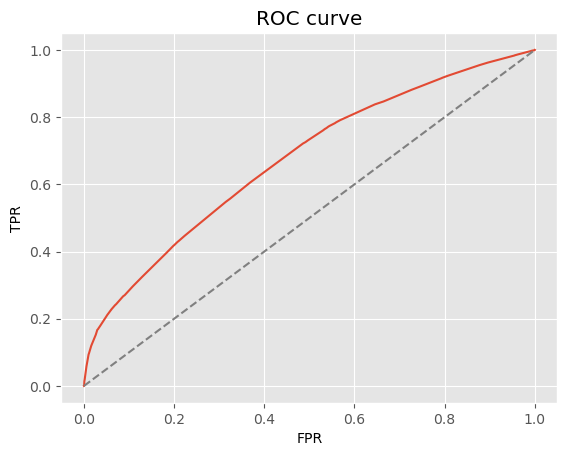

In [392]:
plt.clf()
plt.plot(fpr, tpr)#la roc curve no sirve de mucho a nivel de comparar el modelo. lo que da mas informacion es AUC
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()


In [393]:
results_by_score = results_df.pivot_table(index='HasDetectionScore', values='Success', aggfunc=[len, sum, np.mean])

In [394]:
results_by_score.columns = ['Count', 'Sum', 'Mean']

<Axes: xlabel='HasDetectionScore'>

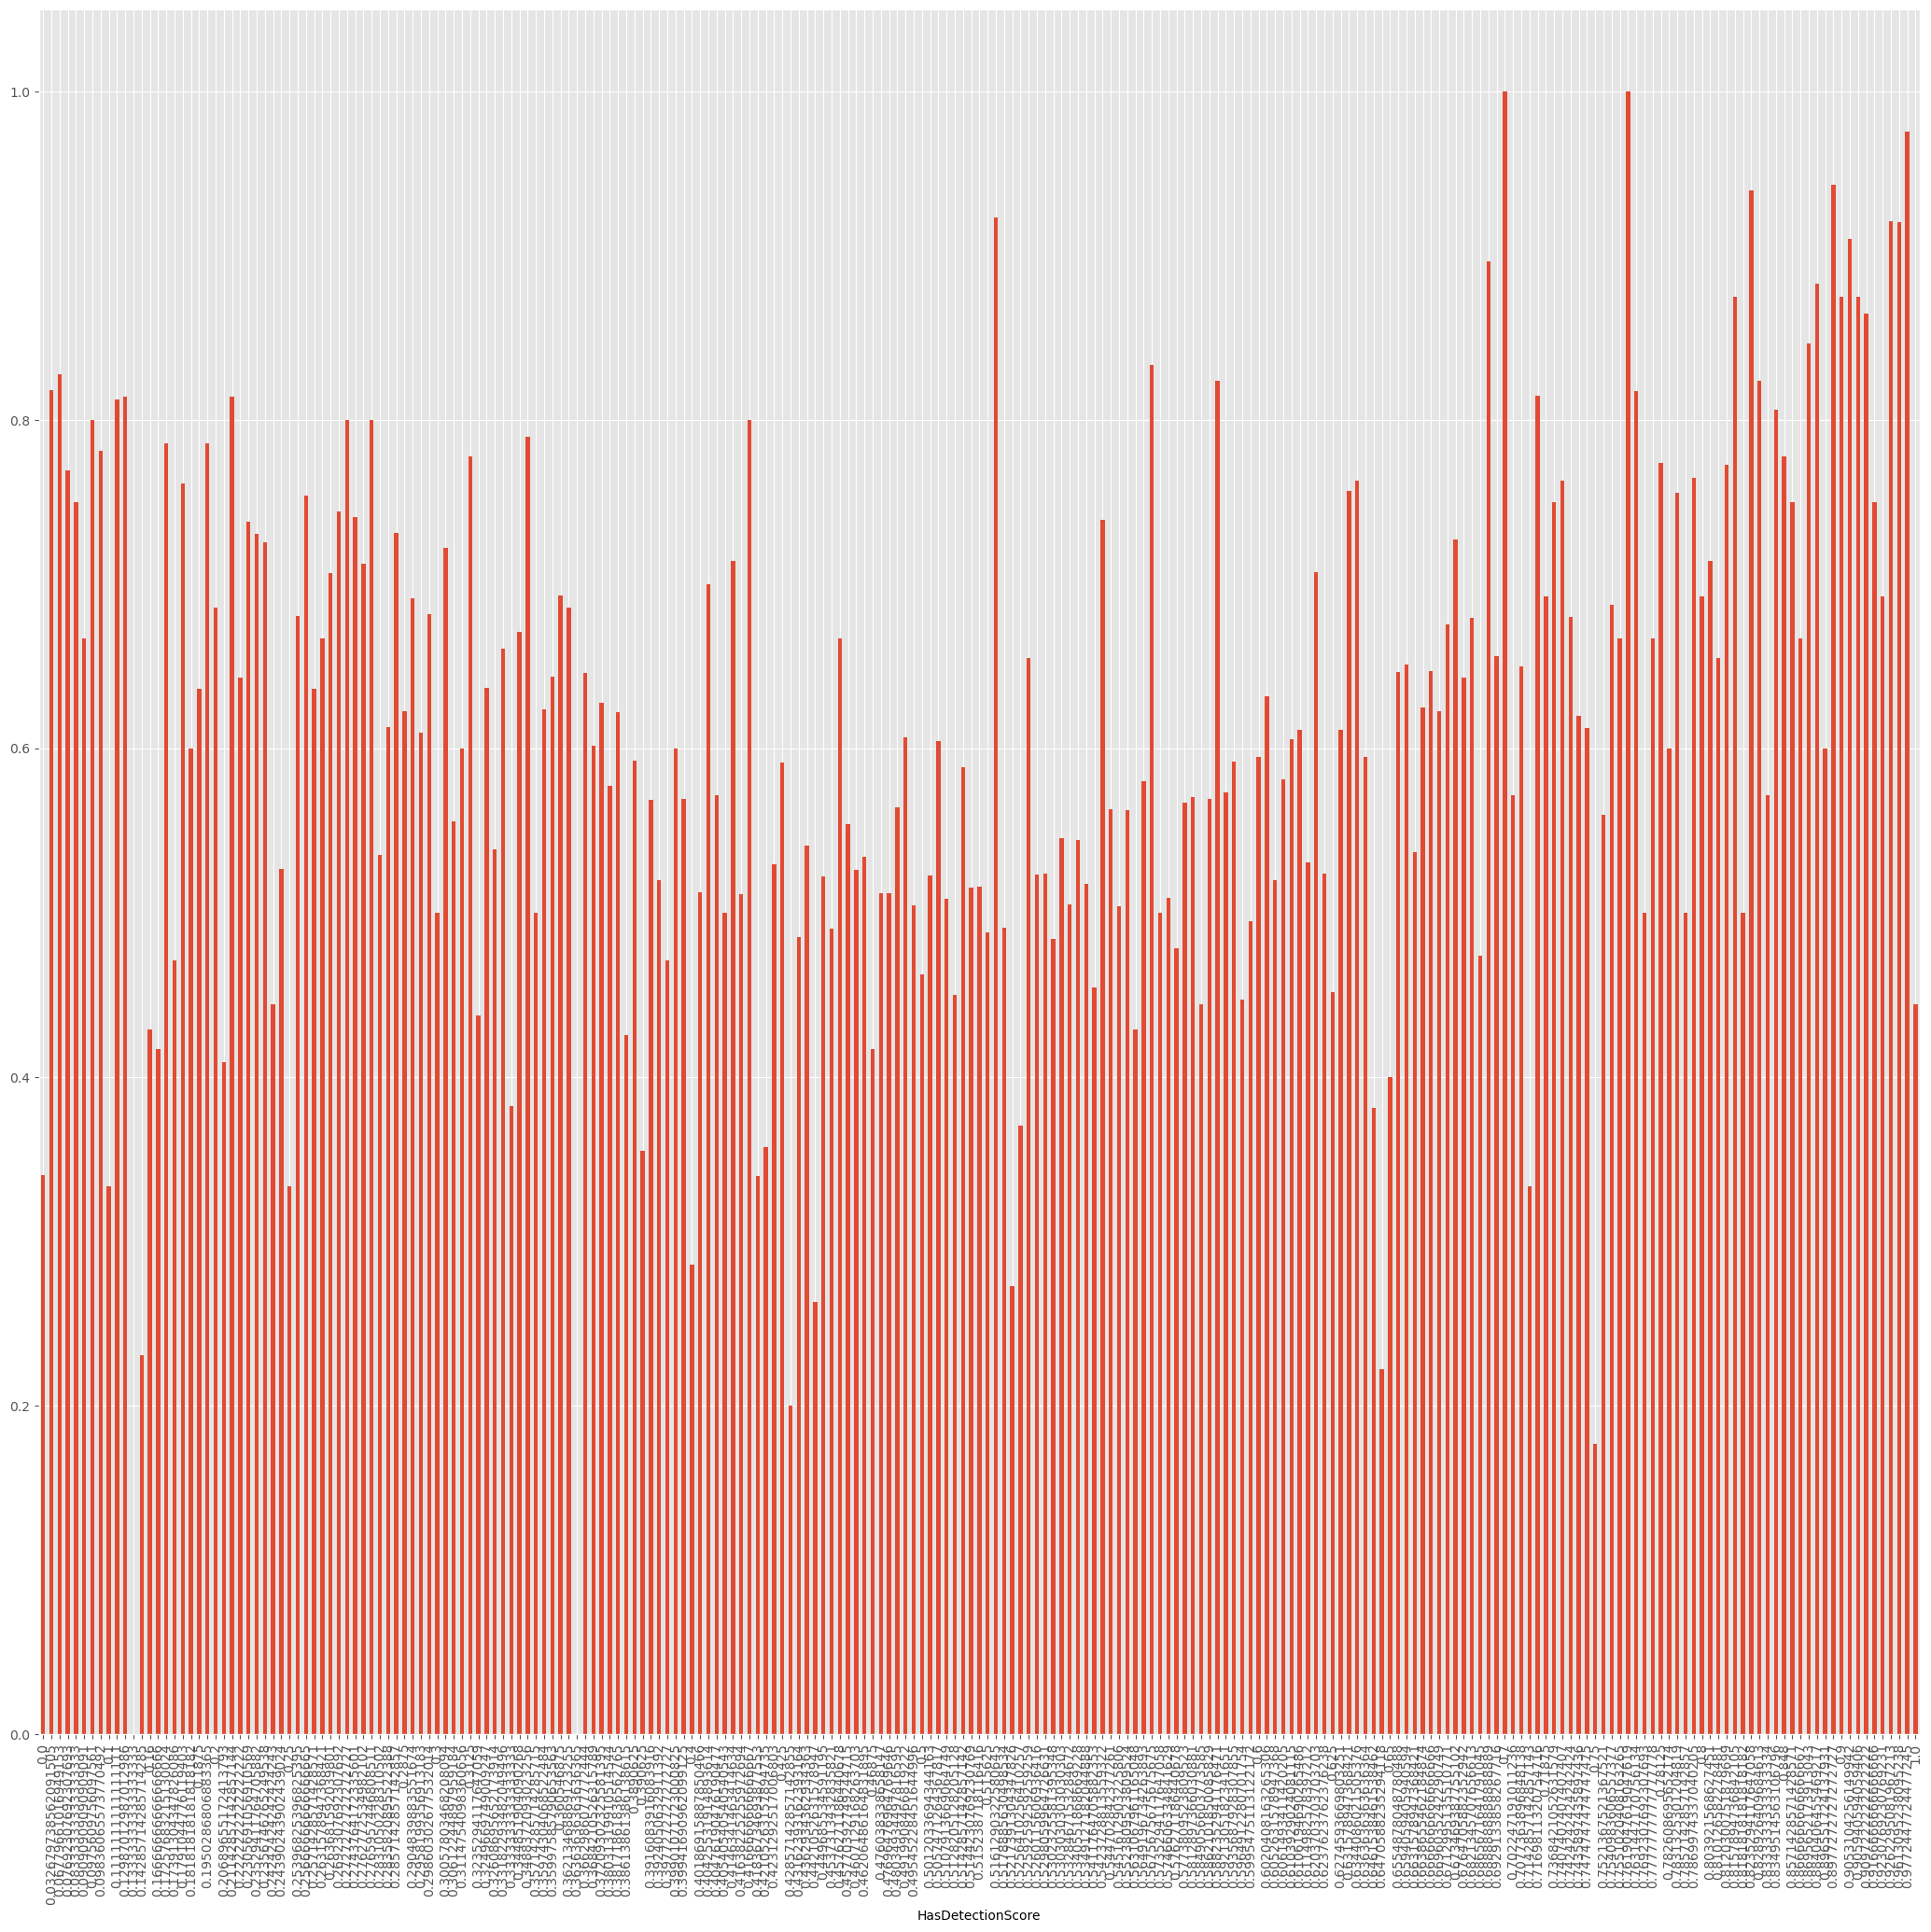

In [395]:
plt.figure(figsize=(26,24))

results_by_score['Mean'].plot(kind='bar')

    Evaluación de Algoritmos alternativos

In [403]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [397]:
#intanciar el modelo 
rf=RandomForestClassifier(n_estimators=20, max_depth=4 , random_state=42)
#El Random Forest genera un listado de estimadores (los modelos de base) consultable, de manera que podemos trabajar con cada uno de éstos como si se 
#tratase de un modelo independiente

In [398]:
rf.fit(X=X_train, y=np.ravel(y_train)) #ravel asegurar 1 dimension

RandomForestClassifier(max_depth=4, n_estimators=20, random_state=42)

In [399]:
tree_list=rf.estimators_

In [405]:
dot_data_rf0=export_graphviz(
    decision_tree=tree_list[0],
    out_file=None, #significa que lo que haga la funcion es sacar un string con todas las preguntar que se hizo y no se guardan en ningun otro archivo extra.
    feature_names= X_test.columns,
    class_names=['No Detection', 'Has Detection'], #en lugar de poner 0 y 1 nos dice explicitamente lo que queremos ponerle.
    filled= True,
    impurity=True,
    proportion=True,#da en proporcion en vez de conteo
    rotate=True,
    rounded=True,
    precision=3    
)

In [415]:
graph2=graphviz.Source(dot_data_rf0,format='png')
graph2.save("decision_tree2")
graph2

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [417]:
pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20) 
#esta funcion nos da la importancia de cada una de las variables


SmartScreen_ExistsNotSet                              0.2015
SmartScreen_RequireAdmin                              0.1363
AVProductStatesIdentifier_53447.0                     0.1253
AVProductStatesIdentifier_7945.0                      0.0950
EngineVersion_1.1.15100.1                             0.0478
AppVersion_4.14.17639.18041                           0.0471
AppVersion_4.18.1807.18075                            0.0364
EngineVersion_1.1.14901.4                             0.0299
Census_ChassisTypeName_Other                          0.0238
AVProductStatesIdentifier_Others                      0.0191
Census_PowerPlatformRoleName_Slate                    0.0172
Census_OSSkuName_CORE                                 0.0154
Census_OSVersion_10.0.17134.165                       0.0118
EngineVersion_1.1.14800.3                             0.0105
OsBuildLab_16299.15.x86fre.rs3_release.170928-1534    0.0100
Census_InternalBatteryType_unknown                    0.0097
OsBuildLab_17134.1.x86fr

In [418]:
top_features

SmartScreen_ExistsNotSet                      0.4418
AVProductStatesIdentifier_53447.0             0.1975
EngineVersion_1.1.15100.1                     0.0448
Census_PowerPlatformRoleName_Slate            0.0432
EngineVersion_1.1.15200.1                     0.0215
AppVersion_4.18.1807.18075                    0.0155
Census_ChassisTypeName_Other                  0.0152
AVProductStatesIdentifier_63682.0             0.0134
AVProductStatesIdentifier_47238.0             0.0097
Census_OSSkuName_CORE_SINGLELANGUAGE          0.0097
AvSigVersion_Others                           0.0084
Census_OSBranch_rs4_release                   0.0080
Census_FirmwareManufacturerIdentifier_142.0   0.0074
AVProductStatesIdentifier_46413.0             0.0068
AppVersion_4.16.17656.18052                   0.0059
Census_OSVersion_10.0.17134.165               0.0055
Census_FirmwareManufacturerIdentifier_677.0   0.0051
AppVersion_4.14.17639.18041                   0.0048
Wdft_RegionIdentifier_-1.0                    

<Axes: >

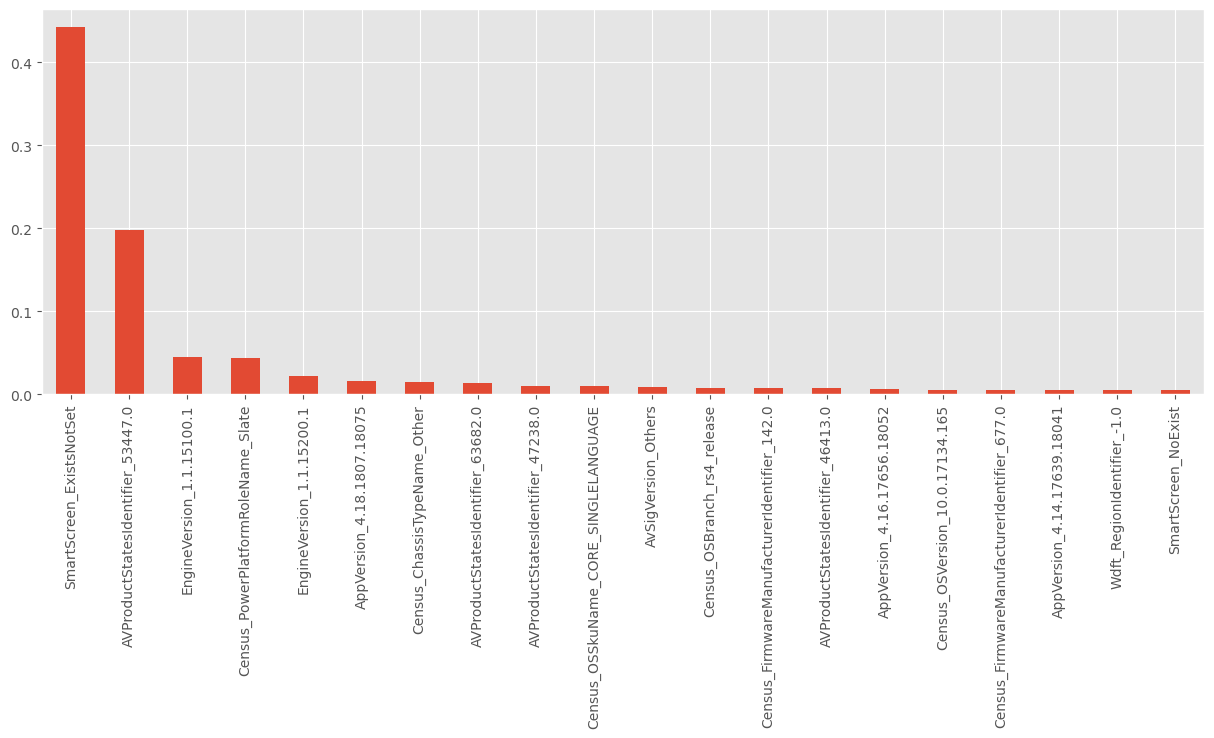

In [419]:
plt.figure(figsize=(15,5))
top_features.plot(kind='bar')

In [420]:
y_scorerf=pd.DataFrame(rf.predict_proba(X_test)[:,1], index=y_test.index, columns=['HasDetectionScore']) #el random forest hace el mismo predict de antes

In [421]:
y_scorerf

,HasDetectionScore
193120,0.4794
352164,0.5198
90438,0.5813
492497,0.6054
359067,0.4905
...,...
400835,0.5031
379442,0.5011
239377,0.4914
33684,0.4353


In [422]:
results_df_rf=y_test.join(y_scorerf)

In [423]:
results_df_rf.head(1)

,HasDetections,HasDetectionScore
193120,True,0.4794


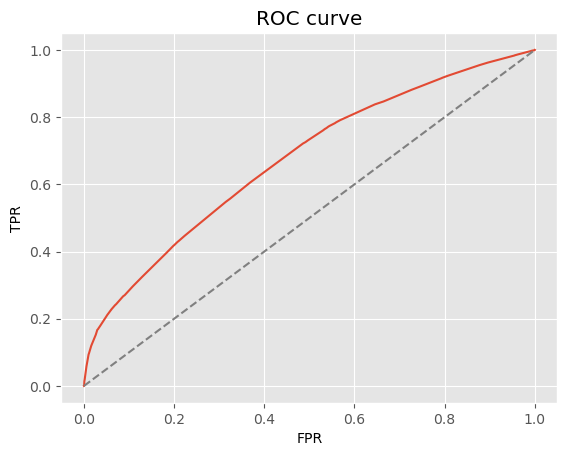

In [424]:
fpr, tpr, th=metrics.roc_curve(results_df[TARGET], results_df['HasDetectionScore'])#hay que pasar siempre la probabilidad, no el 1s y 0s como hicimos antes
plt.clf()
plt.plot(fpr, tpr)#la roc curve no sirve de mucho a nivel de comparar el modelo. lo que da mas informacion es AUC
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [426]:
results_df_rf['HasDetectionScore'].nunique() #numero de valores distintos que tengo en esa columna
#este numero es el num de probabilidades distintas

19173

In [427]:
results_df_rf['Decil']=pd.qcut(results_df_rf['HasDetectionScore'], q=10) 
#trabajamos con hacer los percentiles, 10


In [428]:
results_df_rf.head(10)

,HasDetections,HasDetectionScore,Decil
193120,True,0.4794,"(0.465, 0.48]"
352164,False,0.5198,"(0.516, 0.524]"
90438,True,0.5813,"(0.547, 0.649]"
492497,True,0.6054,"(0.547, 0.649]"
359067,True,0.4905,"(0.488, 0.498]"
18454,False,0.5143,"(0.508, 0.516]"
303990,False,0.5178,"(0.516, 0.524]"
121081,False,0.5668,"(0.547, 0.649]"
148292,False,0.5228,"(0.516, 0.524]"
156227,True,0.5053,"(0.498, 0.508]"


In [429]:
results_df_rf.pivot_table(index='Decil', values=TARGET, aggfunc=[len, np.sum, np.mean])

,len,sum,mean
,HasDetections,HasDetections,HasDetections
Decil,,,
"(0.338, 0.45]",10502,2892,0.2754
"(0.45, 0.465]",10498,3515,0.3348
"(0.465, 0.48]",10537,4157,0.3945
"(0.48, 0.488]",10534,4877,0.4630
"(0.488, 0.498]",10495,5139,0.4897
"(0.498, 0.508]",10472,5351,0.5110
"(0.508, 0.516]",10462,5628,0.5379
"(0.516, 0.524]",10500,5762,0.5488


ROC AUC Score for DecisionTree: 0.6688063814708062
ROC AUC Score for RandomForest: 0.6846473782080454
ROC AUC Score for GradientBoosting: 0.693264932552585


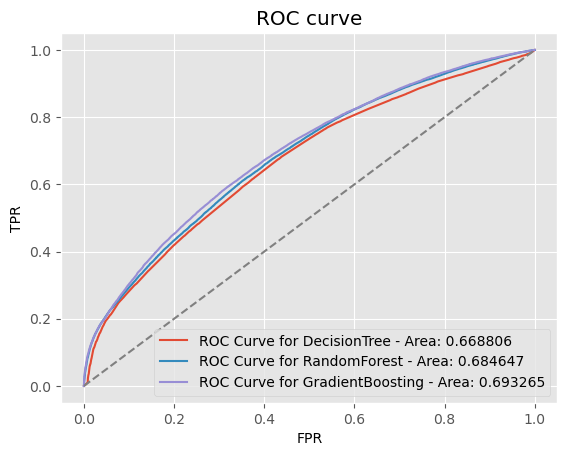

In [430]:
RANDOM_STATE = 42
n_estimators = 50
max_depth = 14

models = [ 
    ('DecisionTree', DecisionTreeClassifier(max_depth=max_depth, random_state=42)),
    ('RandomForest', RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=RANDOM_STATE)),
    ('GradientBoosting', GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=RANDOM_STATE))
]

for model in models:
    model_name = model[0]
    model_instance = model[1]
    model_instance.fit(X_train, np.ravel(y_train))
    predictions = model_instance.predict_proba(X_test)[:,1]
    auc_score = metrics.roc_auc_score(y_test, predictions)
    print('ROC AUC Score for {}: {}'.format(model_name, auc_score))
    fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
    plt.plot(fpr, tpr, label='ROC Curve for {} - Area: {:2f}'.format(model_name, auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()

    Resumen descriptivo y análisis de los modelos:

    Decision Tree:

    Precisión en el conjunto de entrenamiento: Alrededor del 99%.
    Precisión en el conjunto de prueba: Alrededor del 61-62%.
    El modelo muestra un rendimiento significativo en el conjunto de entrenamiento, pero su precisión en el conjunto de prueba es relativamente baja, lo que indica que puede estar sobreajustando los datos de entrenamiento y no generalizando bien en nuevos datos.

    Random Forest:

    Precisión en el conjunto de entrenamiento: Alrededor del 99%.
    Precisión en el conjunto de prueba: Alrededor del 68-69%.
    El modelo de Random Forest muestra una mejora en la precisión en comparación con el Decision Tree. La utilización de múltiples árboles de decisión y la combinación de sus resultados ayuda a reducir el sobreajuste y mejorar la generalización en nuevos datos.

    Gradient Boosting:
    Precisión en el conjunto de entrenamiento: Alrededor del 85%.
    Precisión en el conjunto de prueba: Alrededor del 69-70%.
    El modelo de Gradient Boosting muestra una precisión similar al Random Forest, pero con un menor rendimiento en el conjunto de entrenamiento.       Esto indica que el modelo está menos propenso al sobreajuste y tiene una mejor capacidad de generalización en nuevos datos.
En términos de rendimiento general, el modelo de Gradient Boosting muestra la mejor precisión en el conjunto de prueba y un alto valor de ROC AUC Score. Esto indica que tiene una mejor capacidad de discriminación entre las clases positivas y negativas.